## Project Objective

The goal of this project is to develop a predictive model to estimate **regional income levels** based on demographic and housing characteristics. This model helps uncover key income-related factors and can support strategic planning for services, development projects, or marketing targeting.


## Models Used

To model income predictions, the following machine learning algorithms were applied and evaluated:

- **Random Forest Regressor** 
- **ANN**
- **K-Nearest Neighbors (KNN)** 



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, confusion_matrix, adjusted_rand_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.cluster import KMeans, Birch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Part I

In [ ]:
train = pd.read_csv('CensusCanada2021Training.csv')
train.head()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0


Through EDA we found three noticible issues: 1)some missing values in some of the columns, 2)some naming issues in the columns, eg. 'Construction Built Between 1991 And 190', 3) some column names are too long.

In [ ]:
train.columns

Index(['Total Population', 'Total Households',
       'Median Household Income (Current Year $)',
       'Total Households For Period Of Construction',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Period Of Construction Built Between 2006 And 2010',
       'Total Households For Period Of Construction Built Between 2011 And 2015',
       'Total Households For Period Of Construction Built Between 2016 And 2021',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',

In [ ]:
#Rename Columns
column_mapping = {'Total Population': 'tot_pop',
                      'Total Households': 'tot_hos',
                      'Median Household Income (Current Year $)':'median_income',
                      'Total Households For Period Of Construction':'tot_hh_cons',
                      'Total Households For Period Of Construction Built Before 1961':'tot_hh_cons_61',
                      'Total Households For Period Of Construction Built Between 1961 And 1980':'tot_hh_cons_61_80',
                      'Total Households For Period Of Construction Built Between 1981 And 190':'tot_hh_cons_81_90',
                      'Total Households For Period Of Construction Built Between 1991 And 2000':'tot_hh_cons_91_00',
                      'Total Households For Period Of Construction Built Between 2001 And 2005':'tot_hh_cons_01_05',
                      'Total Households For Period Of Construction Built Between 2006 And 2010':'tot_hh_cons_06_10',
                      'Total Households For Period Of Construction Built Between 2011 And 2015':'tot_hh_cons_11_15',
                      'Total Households For Period Of Construction Built Between 2016 And 2021':'tot_hh_cons_16_21',
                      'Total Households For Structure Type Houses':'tot_hh_house',
                      'Total Households For Structure Type Apartment, Building Low And High Rise':'tot_hh_apt',
                      'Total Households For Structure Type Other Dwelling Types':'tot_hh_other',
                      'Total Households for Tenure':'tot_hh_tenure',
                      'Dwellings by Tenure Owner':'tot_hh_owner',
                      'Dwellings by Tenure Renter':'tot_hh_rent'}

reversed_mapping = {v: k for k, v in column_mapping.items()}

train.rename(columns=column_mapping, inplace=True)

train.columns

Index(['tot_pop', 'tot_hos', 'median_income', 'tot_hh_cons', 'tot_hh_cons_61',
       'tot_hh_cons_61_80', 'tot_hh_cons_81_90', 'tot_hh_cons_91_00',
       'tot_hh_cons_01_05', 'tot_hh_cons_06_10', 'tot_hh_cons_11_15',
       'tot_hh_cons_16_21', 'tot_hh_house', 'tot_hh_apt', 'tot_hh_other',
       'tot_hh_tenure', 'tot_hh_owner', 'tot_hh_rent'],
      dtype='object')

In [ ]:
train.describe()
#Consider drop Total household/Total household for period of construction

,tot_pop,tot_hos,median_income,tot_hh_cons,tot_hh_cons_61,tot_hh_cons_61_80,tot_hh_cons_81_90,tot_hh_cons_91_00,tot_hh_cons_01_05,tot_hh_cons_06_10,tot_hh_cons_11_15,tot_hh_cons_16_21,tot_hh_house,tot_hh_apt,tot_hh_other,tot_hh_tenure,tot_hh_owner,tot_hh_rent
count,5371.000000,5297.000000,5245.000000,5297.000000,5297.000000,5297.000000,5297.000000,5297.000000,5297.000000,5297.000000,5297.000000,5297.000000,5371.000000,5371.000000,5371.000000,5297.000000,5297.000000,5297.000000
mean,4489.031838,1816.994525,80443.679695,1816.994525,338.997546,496.073249,242.587314,222.876156,125.332264,130.834435,123.451010,135.383236,1046.172035,734.151927,19.353938,1816.994525,1160.989239,655.213328
std,2156.361974,863.753697,23524.348532,863.753697,379.716644,415.050415,240.979997,234.365065,179.851696,200.645772,214.001103,283.595922,718.516913,835.859699,61.356194,863.753697,642.262741,609.258696
min,0.000000,10.000000,23400.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,3146.500000,1255.000000,62800.000000,1255.000000,40.000000,145.000000,70.000000,65.000000,20.000000,15.000000,15.000000,10.000000,515.000000,125.000000,0.000000,1255.000000,710.000000,215.000000
50%,4341.000000,1715.000000,78000.000000,1715.000000,190.000000,415.000000,170.000000,145.000000,55.000000,50.000000,45.000000,40.000000,1015.000000,450.000000,0.000000,1715.000000,1105.000000,465.000000
75%,5727.000000,2275.000000,96000.000000,2275.000000,535.000000,755.000000,335.000000,305.000000,150.000000,155.000000,135.000000,135.000000,1465.000000,1065.000000,17.500000,2275.000000,1520.000000,925.000000
max,29669.000000,7895.000000,240000.000000,7895.000000,2140.000000,3160.000000,1665.000000,2485.000000,1870.000000,2250.000000,2835.000000,5625.000000,7165.000000,7830.000000,1665.000000,7895.000000,6080.000000,5290.000000


In [ ]:
#Check # of null within each column
train.isnull().sum()

tot_pop                0
tot_hos               74
median_income        126
tot_hh_cons           74
tot_hh_cons_61        74
tot_hh_cons_61_80     74
tot_hh_cons_81_90     74
tot_hh_cons_91_00     74
tot_hh_cons_01_05     74
tot_hh_cons_06_10     74
tot_hh_cons_11_15     74
tot_hh_cons_16_21     74
tot_hh_house           0
tot_hh_apt             0
tot_hh_other           0
tot_hh_tenure         74
tot_hh_owner          74
tot_hh_rent           74
dtype: int64

Since the core of the business is tightly connected to income prediction. So we removed observations have missing data in 'Population', 'Households' and 'Income', and have less than around 80% values in any row.

### Data Preprocessing

In [ ]:
#Data Cleaning - Drop rows where Median Household Income (Current Year $) - 'median_income' is NULL
train = train.dropna(subset = ['median_income'])
train.isnull().sum()

tot_pop              0
tot_hos              0
median_income        0
tot_hh_cons          0
tot_hh_cons_61       0
tot_hh_cons_61_80    0
tot_hh_cons_81_90    0
tot_hh_cons_91_00    0
tot_hh_cons_01_05    0
tot_hh_cons_06_10    0
tot_hh_cons_11_15    0
tot_hh_cons_16_21    0
tot_hh_house         0
tot_hh_apt           0
tot_hh_other         0
tot_hh_tenure        0
tot_hh_owner         0
tot_hh_rent          0
dtype: int64

In [ ]:
train.describe()

,tot_pop,tot_hos,median_income,tot_hh_cons,tot_hh_cons_61,tot_hh_cons_61_80,tot_hh_cons_81_90,tot_hh_cons_91_00,tot_hh_cons_01_05,tot_hh_cons_06_10,tot_hh_cons_11_15,tot_hh_cons_16_21,tot_hh_house,tot_hh_apt,tot_hh_other,tot_hh_tenure,tot_hh_owner,tot_hh_rent
count,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000
mean,4594.854909,1834.419447,80443.679695,1834.419447,342.287893,500.864633,244.901811,224.994280,126.534795,132.091516,124.653003,136.660629,1070.862726,751.704480,19.722593,1834.419447,1172.188751,661.563394
std,2069.725993,850.013882,23524.348532,850.013882,380.144736,414.288389,241.040533,234.549266,180.331843,201.237048,214.716574,284.702324,708.986169,838.038636,61.981444,850.013882,635.455854,608.902534
min,266.000000,85.000000,23400.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,0.000000
25%,3242.000000,1270.000000,62800.000000,1270.000000,40.000000,155.000000,70.000000,65.000000,20.000000,20.000000,15.000000,15.000000,550.000000,140.000000,0.000000,1270.000000,730.000000,220.000000
50%,4394.000000,1725.000000,78000.000000,1725.000000,190.000000,420.000000,175.000000,145.000000,55.000000,55.000000,45.000000,40.000000,1035.000000,475.000000,5.000000,1725.000000,1110.000000,475.000000
75%,5772.000000,2285.000000,96000.000000,2285.000000,540.000000,760.000000,340.000000,305.000000,150.000000,155.000000,135.000000,135.000000,1480.000000,1085.000000,20.000000,2285.000000,1525.000000,935.000000
max,29669.000000,7895.000000,240000.000000,7895.000000,2140.000000,3160.000000,1665.000000,2485.000000,1870.000000,2250.000000,2835.000000,5625.000000,7165.000000,7830.000000,1665.000000,7895.000000,6080.000000,5290.000000


We added a column 'House size', calculated using population divided by total households, showing the average size (# of individuals) in each household.

In [ ]:
#New column: Household size
train['hos_size'] = train['tot_pop']/train['tot_hos']

Convert columns to percentage to total household exclude 'hos_size', 'median_income','tot_hos','tot_hh_cons','tot_hh_tenure','tot_pop'

In [ ]:
excluded_col = ['hos_size', 'median_income','tot_hos','tot_hh_cons','tot_hh_tenure','tot_pop']
train_pct1 = train.copy()

# Identify the columns to calculate percentage
pct_col = [col for col in train_pct1.columns if col not in excluded_col]

# Calculate percentage for all eligible columns
for col in pct_col:
    train_pct1[f'pct_{col}'] = (train_pct1[col] / train_pct1['tot_hos'])
    train_pct1.drop(columns = col, inplace = True)


In [ ]:
train_pct1

,tot_pop,tot_hos,median_income,tot_hh_cons,tot_hh_tenure,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house,pct_tot_hh_apt,pct_tot_hh_other,pct_tot_hh_owner,pct_tot_hh_rent
0,3088,1235.0,107000.0,1235.0,1235.0,2.500405,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028,0.105263,0.000000,0.854251,0.145749
1,5889,1665.0,111000.0,1665.0,1665.0,3.536937,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964,0.030030,0.006006,0.819820,0.180180
2,8090,2775.0,105000.0,2775.0,2775.0,2.915315,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856,0.144144,0.000000,0.850450,0.151351
3,4074,1775.0,65000.0,1775.0,1775.0,2.295211,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676,0.154930,0.132394,0.774648,0.225352
4,3642,1385.0,101000.0,1385.0,1385.0,2.629603,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292,0.234657,0.018051,0.902527,0.101083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,3409,1460.0,84000.0,1460.0,1460.0,2.334932,0.010274,0.000000,0.000000,0.000000,0.013699,0.027397,0.318493,0.626712,0.534247,0.462329,0.003425,0.726027,0.273973
5367,8408,4195.0,62800.0,4195.0,4195.0,2.004291,0.079857,0.178784,0.122765,0.138260,0.084625,0.120381,0.060787,0.214541,0.358760,0.640048,0.001192,0.439809,0.560191
5368,3609,1460.0,66000.0,1460.0,1460.0,2.471918,0.308219,0.458904,0.058219,0.023973,0.020548,0.020548,0.082192,0.030822,0.835616,0.188356,0.000000,0.643836,0.359589
5369,3084,1165.0,100000.0,1165.0,1165.0,2.647210,0.060086,0.313305,0.240343,0.154506,0.090129,0.068670,0.042918,0.034335,0.699571,0.287554,0.012876,0.836910,0.163090


## EDA

#### Original Dataset

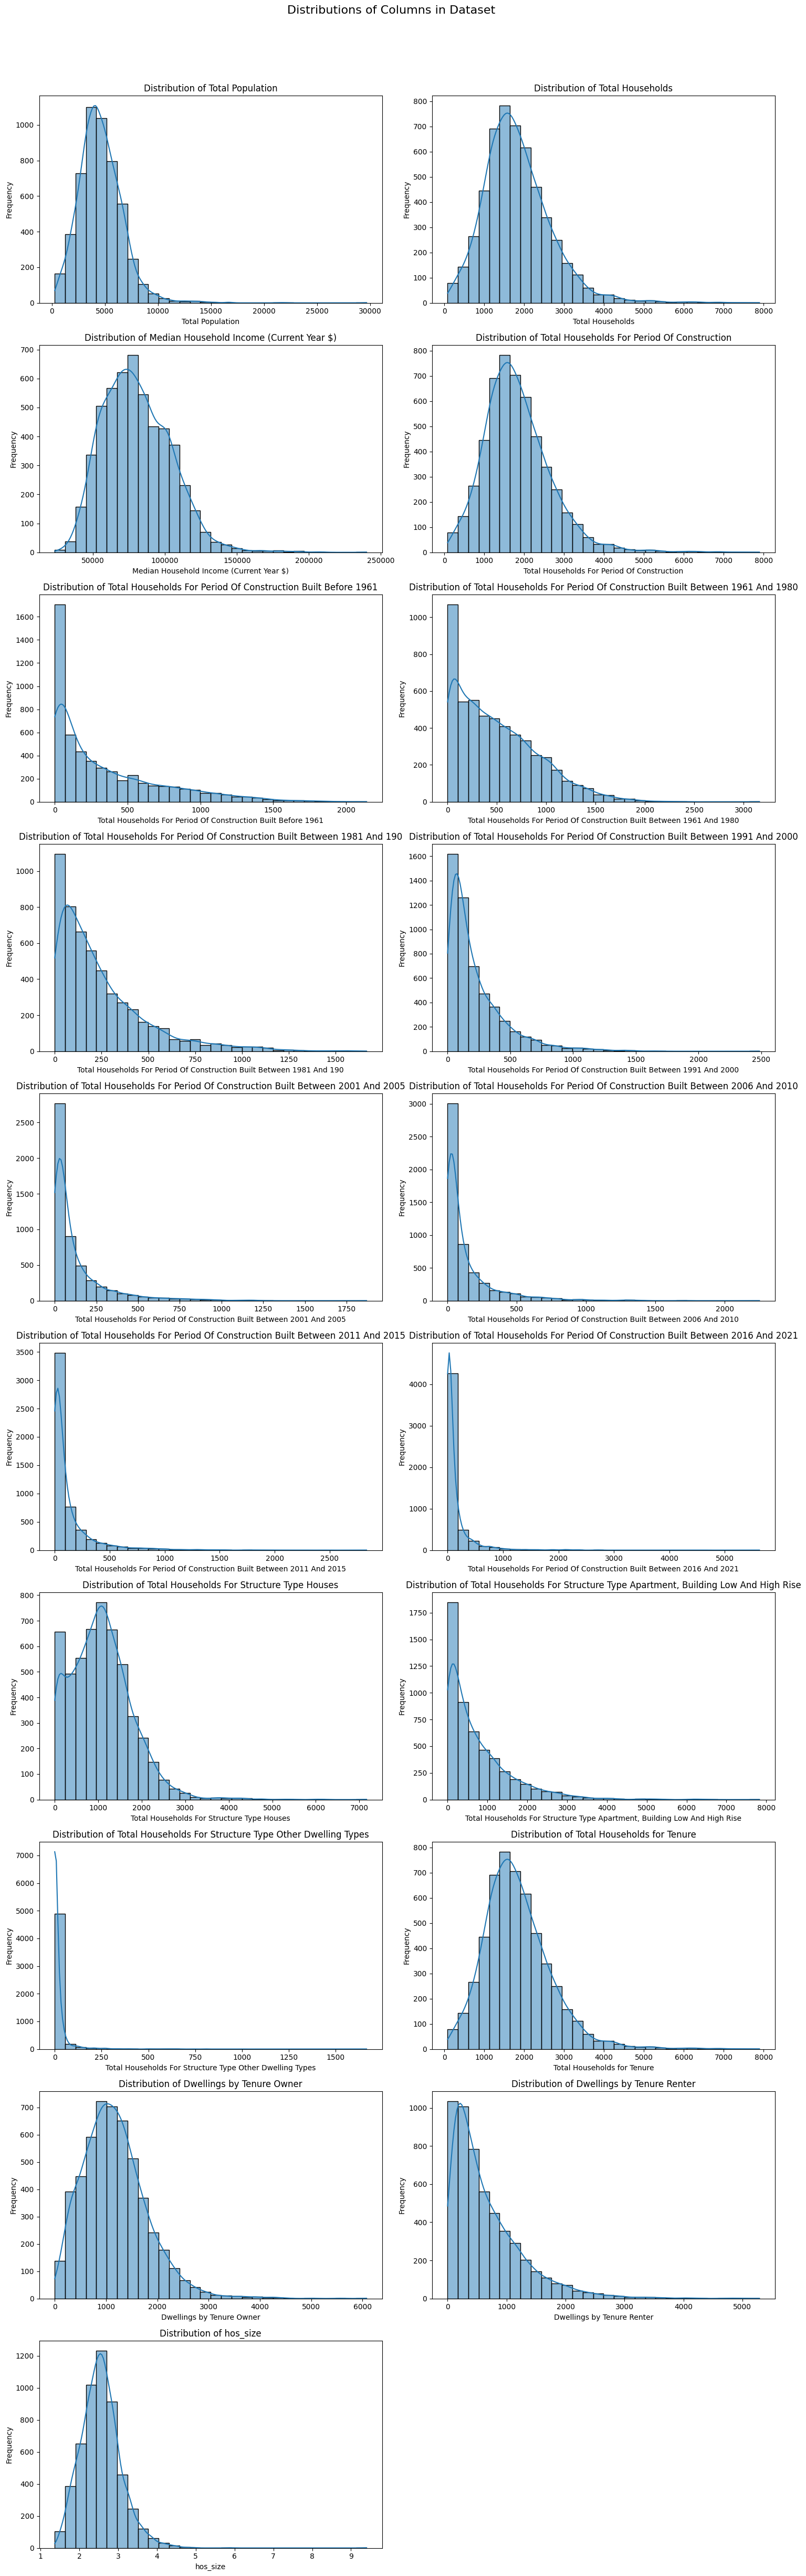

In [ ]:
#Plot Distribution of Variables
num_columns = len(train.columns)
rows = int(np.ceil(num_columns / 2))

fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
fig.suptitle('Distributions of Columns in Dataset', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(train.columns):
    sns.histplot(train[column], bins=30, kde=True, ax=axes[i])
    col_name = reversed_mapping.get(column, column)
    axes[i].set_title(f'Distribution of {col_name}')
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Frequency')

for i in range(len(train.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


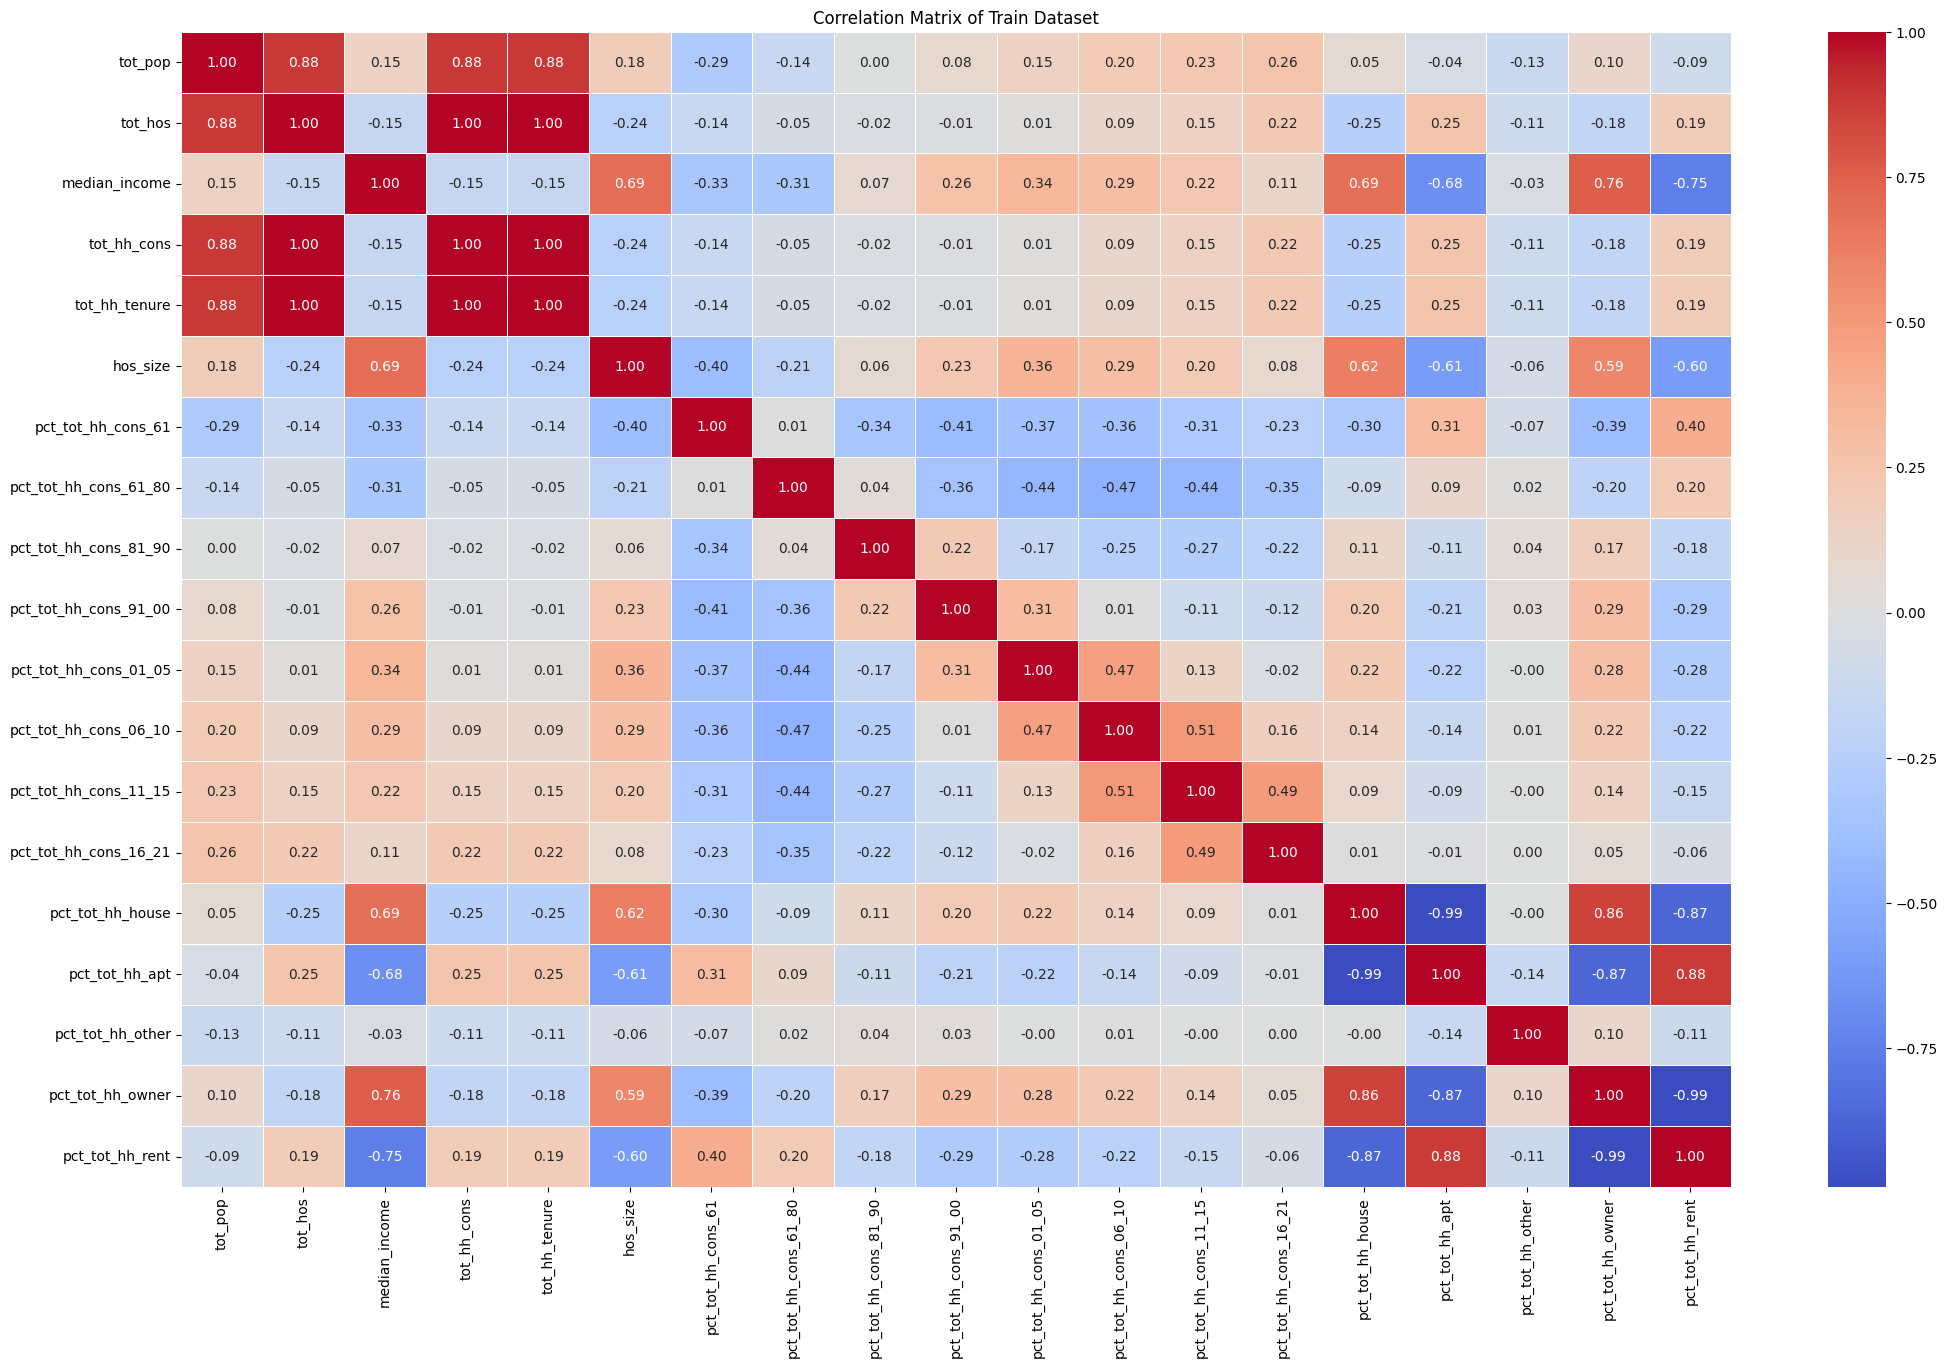

In [ ]:
#Correlation Matrix
plt.figure(figsize=(25,15))
plt.title('Correlation Matrix of Train Dataset')
corr_matrix = train_pct1.corr()
sns.heatmap(corr_matrix, annot = True,fmt=".2f",cmap='coolwarm', linewidths=0.5,annot_kws={"size": 10})
plt.show()

#### Cleaned Dataset

In [ ]:
#Remove high corrlated columns based on correlation matrix (high correlation; extreme low correlation with other variables 'tot_hh_other')
df_train = train.drop(columns = ['tot_hh_cons', 'tot_hh_tenure', 'tot_pop', 'tot_hh_owner', 'tot_hh_rent','tot_hh_other','tot_hh_apt'])

In [ ]:
train_pct1 = train_pct1.drop(columns = ['tot_hh_cons', 'tot_hh_tenure', 'tot_pop', 'pct_tot_hh_owner', 'pct_tot_hh_rent','pct_tot_hh_other','pct_tot_hh_apt'])

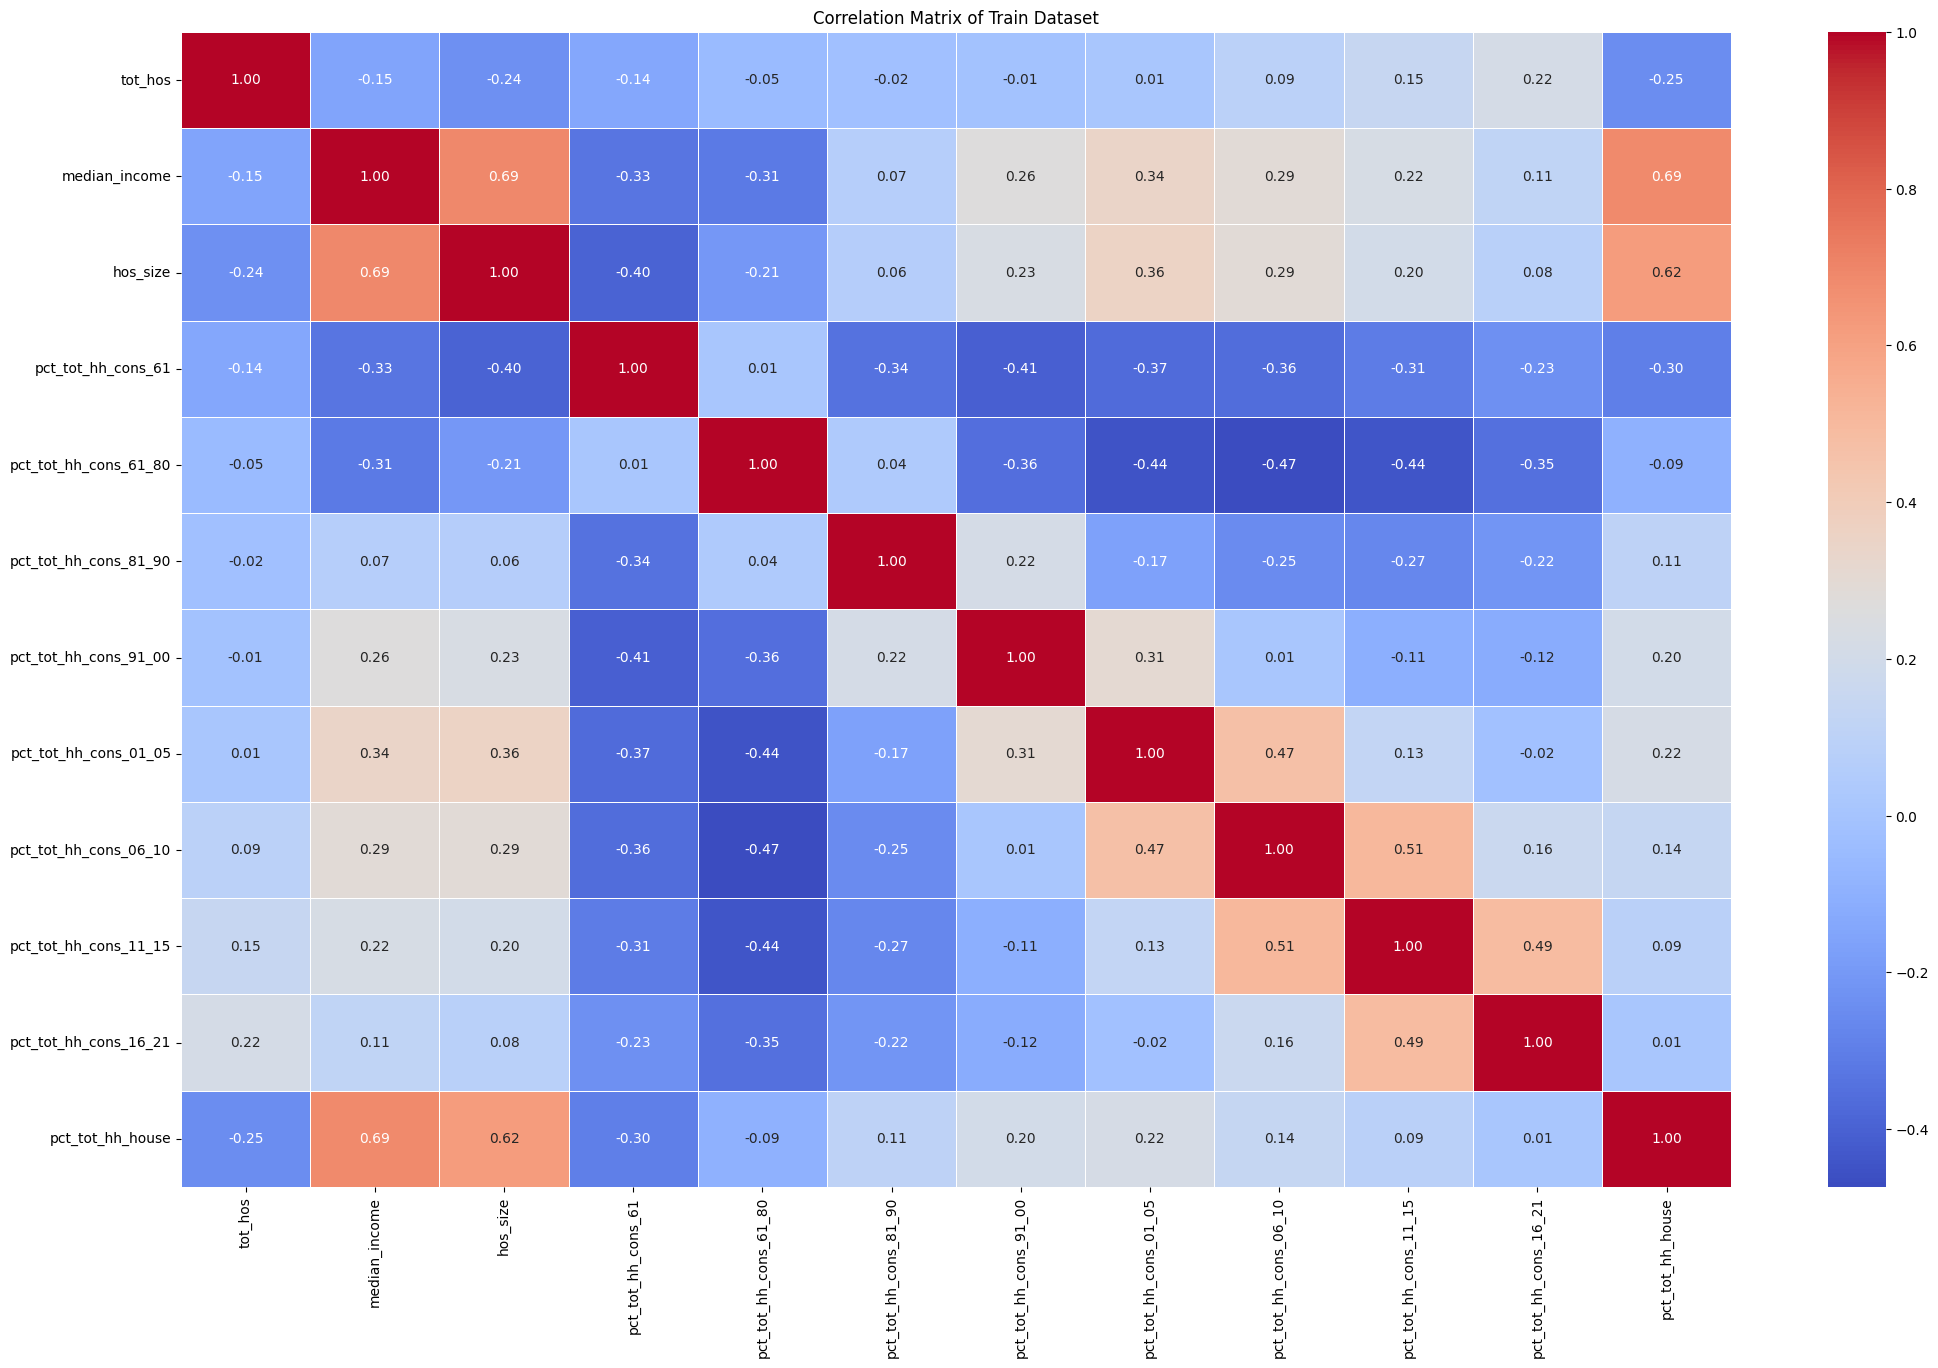

In [ ]:
#Correlation Matrix of cleaned data
plt.figure(figsize=(25,15))
plt.title('Correlation Matrix of Train Dataset')
corr_matrix = train_pct1.corr()
sns.heatmap(corr_matrix, annot = True,fmt=".2f",cmap='coolwarm', linewidths=0.5,annot_kws={"size": 10})
plt.show()

In [ ]:
df_train.head()

,tot_hos,median_income,tot_hh_cons_61,tot_hh_cons_61_80,tot_hh_cons_81_90,tot_hh_cons_91_00,tot_hh_cons_01_05,tot_hh_cons_06_10,tot_hh_cons_11_15,tot_hh_cons_16_21,tot_hh_house,hos_size
0,1235.0,107000.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,2.500405
1,1665.0,111000.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,3.536937
2,2775.0,105000.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,2.915315
3,1775.0,65000.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,2.295211
4,1385.0,101000.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,2.629603


In [ ]:

train_pct = train_pct1.drop(columns = ['tot_hos'])

In [ ]:
train_pct.head()


,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house
0,107000.0,2.500405,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028
1,111000.0,3.536937,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964
2,105000.0,2.915315,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856
3,65000.0,2.295211,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676
4,101000.0,2.629603,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292


### K-mean Clustering

#### Pick Best K

In [ ]:
#Rescale Household Size and Median Income using MinMaxScaler since other columns are already between 0 and 1
Scaler = MinMaxScaler()
columns_to_scale = ['hos_size', 'median_income']
train_Scaled = train_pct.copy()

train_Scaled[columns_to_scale] = Scaler.fit_transform(train_Scaled[columns_to_scale])

In [ ]:
train_Scaled

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house
0,0.385965,0.141129,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028
1,0.404432,0.270158,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964
2,0.376731,0.192778,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856
3,0.192059,0.115586,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676
4,0.358264,0.157212,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292
...,...,...,...,...,...,...,...,...,...,...,...
5366,0.279778,0.120531,0.010274,0.000000,0.000000,0.000000,0.013699,0.027397,0.318493,0.626712,0.534247
5367,0.181902,0.079372,0.079857,0.178784,0.122765,0.138260,0.084625,0.120381,0.060787,0.214541,0.358760
5368,0.196676,0.137583,0.308219,0.458904,0.058219,0.023973,0.020548,0.020548,0.082192,0.030822,0.835616
5369,0.353647,0.159404,0.060086,0.313305,0.240343,0.154506,0.090129,0.068670,0.042918,0.034335,0.699571


In [ ]:
train_pct_2 = train_pct.copy()

##### Silhouette Method

- Silhouette Scores evaluate how well separated clusters are and how cohesive they are internally
- Highest silhouette score at K = 3, following by k = 4

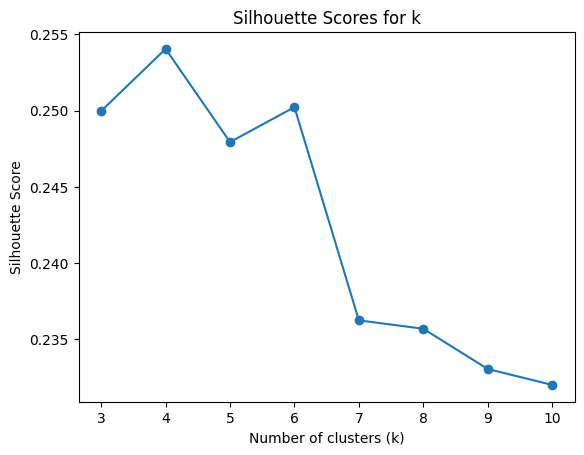

In [ ]:
silhouette_scores = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_Scaled)
    score = silhouette_score(train_Scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

##### Elbow Method

- best K at around 3

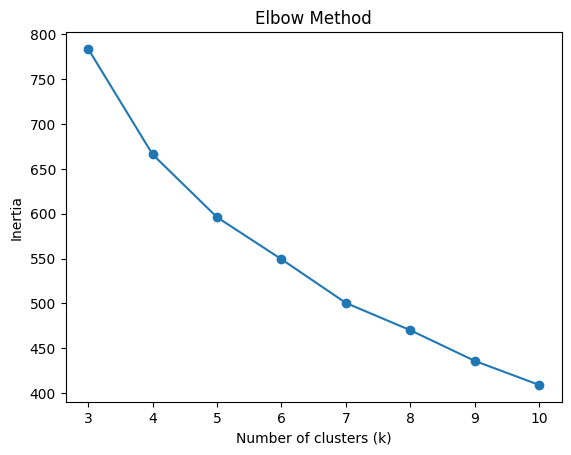

In [ ]:
inertia = []
k_values = range(3, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_Scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### K mean Clustering Model Fit (K = 4)

In [ ]:
train_pct_2_K4 = train_pct_2.copy()

np.random.seed(1)
opt_k = 4
kmean = KMeans(n_clusters = opt_k, random_state = 42)
cluster = kmean.fit_predict(train_Scaled)
train_pct_2_K4['KMean_Cluster'] = kmean.labels_


cluster_median_income = train_pct_2_K4.groupby('KMean_Cluster')['median_income'].median().sort_values()

# Mapping Cluster Lable lowest median income should map to 0, next to 1, and highest to 2
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_median_income.index)}
train_pct_2_K4['KMean_Cluster'] = train_pct_2_K4['KMean_Cluster'].map(cluster_mapping)

In [ ]:
#Cluster Summary - Mean
train_pct_2_K4.groupby('KMean_Cluster').mean()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house
KMean_Cluster,,,,,,,,,,,
0,58927.036517,2.125430,0.264741,0.291813,0.120082,0.099274,0.046241,0.054428,0.054284,0.068293,0.186992
1,78249.930459,2.418291,0.569562,0.226020,0.058320,0.048060,0.020493,0.020991,0.023787,0.030195,0.662174
2,80895.582329,2.610535,0.132640,0.484476,0.168436,0.091537,0.033338,0.031050,0.026838,0.029838,0.761615
3,100059.266169,2.967434,0.041927,0.096794,0.150640,0.208022,0.141779,0.134982,0.117314,0.107030,0.850232


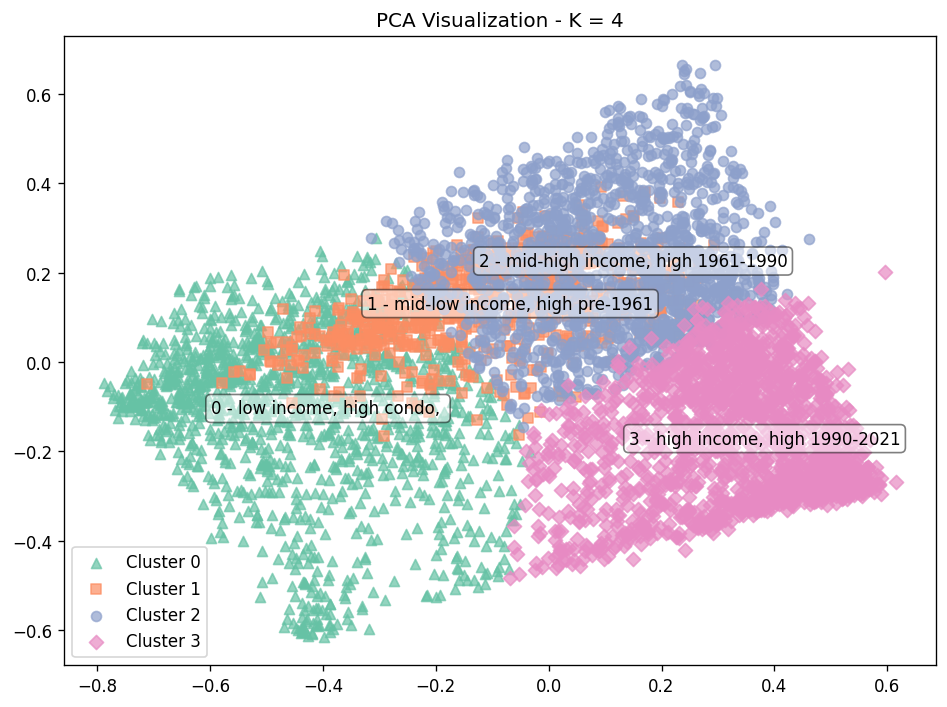

In [ ]:
clusters = train_pct_2_K4['KMean_Cluster']
cluster_colors = sns.color_palette("Set2", n_colors=len(train_pct_2_K4['KMean_Cluster'].unique()))

# Reduce dimensions using PCA
pca = PCA(n_components=2, random_state=42)
train_Scaled_pca = pca.fit_transform(train_Scaled)

cluster_descriptions = {
    0: "low income, high condo, ",
    1: "mid-low income, high pre-1961",
    2: "mid-high income, high 1961-1990",
    3: "high income, high 1990-2021"
}

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

for l, c, m in zip(range(4), cluster_colors, ('^', 's', 'o', 'D')):
    cluster_points = train_Scaled_pca[np.array(clusters) == l]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
               color=c, label=f'Cluster {l}', alpha=0.7, marker=m)

    ax.annotate(f"{l} - {cluster_descriptions[l]}",
                (cluster_points[:, 0].mean(), cluster_points[:, 1].mean()),
                xytext=(15, -5), textcoords='offset points',
                ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))

ax.set_title("PCA Visualization - K = 4")
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
explained_variance = pca.explained_variance_ratio_

# Eigenvectors (principal components loadings)
loadings = pd.DataFrame(pca.components_, columns=train_Scaled.columns, index=['PC1', 'PC2'])

print("Explained Variance Ratio (Proportion of Variance Explained):")
print(explained_variance)

print("\nPrincipal Component Loadings (Contribution of Original Features):")
print(loadings)

Explained Variance Ratio (Proportion of Variance Explained):
[0.43343618 0.19055191]

Principal Component Loadings (Contribution of Original Features):
     median_income  hos_size  pct_tot_hh_cons_61  pct_tot_hh_cons_61_80  \
PC1       0.243110  0.132632           -0.339126              -0.144411   
PC2      -0.054835 -0.021631            0.279506               0.749449   

     pct_tot_hh_cons_81_90  pct_tot_hh_cons_91_00  pct_tot_hh_cons_01_05  \
PC1               0.066238               0.132177               0.108268   
PC2               0.037926              -0.206895              -0.208704   

     pct_tot_hh_cons_06_10  pct_tot_hh_cons_11_15  pct_tot_hh_cons_16_21  \
PC1               0.083130               0.059030               0.033813   
PC2              -0.235315              -0.218082              -0.199960   

     pct_tot_hh_house  
PC1          0.861584  
PC2          0.354979  


#### K mean Clustering Model Fit (K = 3)

In [ ]:
np.random.seed(1)
opt_k = 3
kmean = KMeans(n_clusters = opt_k, random_state = 42)
cluster = kmean.fit_predict(train_Scaled)
train_pct_2['KMean_Cluster'] = kmean.labels_


cluster_median_income = train_pct_2.groupby('KMean_Cluster')['median_income'].median().sort_values()

# Mapping Cluster Lable lowest median income should map to 0, next to 1, and highest to 2
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_median_income.index)}
train_pct_2['KMean_Cluster'] = train_pct_2['KMean_Cluster'].map(cluster_mapping)

#### K mean Cluster Summary

In [ ]:
train_pct_2.head()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house,KMean_Cluster
0,107000.0,2.500405,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028,1
1,111000.0,3.536937,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964,2
2,105000.0,2.915315,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856,2
3,65000.0,2.295211,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676,1
4,101000.0,2.629603,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292,2


In [ ]:
#Cluster Summary - Mean
train_pct_2.groupby('KMean_Cluster').mean()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house
KMean_Cluster,,,,,,,,,,,
0,60083.353733,2.140724,0.304716,0.283138,0.112947,0.092331,0.042462,0.050088,0.050234,0.063133,0.219844
1,81172.394509,2.575032,0.250386,0.421526,0.131101,0.078582,0.030446,0.028844,0.026540,0.030477,0.761302
2,99808.272506,2.964785,0.037515,0.100800,0.160809,0.207869,0.139355,0.132275,0.114875,0.104947,0.845925


In [ ]:
#Cluster Summary - Max
train_pct_2.groupby('KMean_Cluster').max()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house
KMean_Cluster,,,,,,,,,,,
0,128000.0,3.991489,0.945122,0.748918,0.622517,0.694134,0.569620,0.666667,0.666667,0.913043,0.589147
1,240000.0,9.400000,0.951220,0.975728,0.673016,0.371429,0.208791,0.276986,0.264214,0.352041,1.171429
2,188000.0,4.948256,0.347561,0.377850,0.831967,0.930233,0.791946,0.836879,0.833333,0.967568,1.309211


In [ ]:
#Cluster Summary - Min
train_pct_2.groupby('KMean_Cluster').min()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house
KMean_Cluster,,,,,,,,,,,
0,23400.0,1.366667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,41200.0,1.784416,0.0,0.028455,0.0,0.0,0.0,0.0,0.0,0.0,0.372449
2,42000.0,1.739286,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.295977


In [ ]:
#Cluster Summary - Median
train_pct_2.groupby('KMean_Cluster').median()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house
KMean_Cluster,,,,,,,,,,,
0,58000.0,2.070045,0.280628,0.264904,0.092877,0.071429,0.026152,0.026480,0.026480,0.027604,0.215886
1,78000.0,2.542000,0.184384,0.394737,0.108911,0.066265,0.021978,0.018595,0.016340,0.018135,0.769912
2,100000.0,2.900149,0.013575,0.070769,0.105105,0.172006,0.093275,0.091989,0.070069,0.054410,0.888337


In [ ]:
train_pct_2['KMean_Cluster'].value_counts()

KMean_Cluster
1    1967
2    1644
0    1634
Name: count, dtype: int64

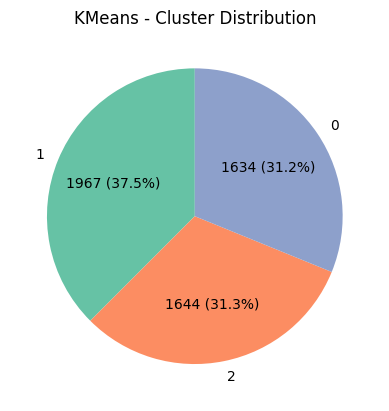

In [ ]:
# Cluster Counts Distribution
cluster_colors = sns.color_palette("Set2", n_colors=len(train_pct_2['KMean_Cluster'].unique()))
counts = train_pct_2['KMean_Cluster'].value_counts()

def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count} ({pct:.1f}%)'
    return inner_autopct

plt.pie(counts, labels=counts.index, autopct=autopct_format(counts), startangle=90, colors=cluster_colors)
plt.title('KMeans - Cluster Distribution')
plt.show()

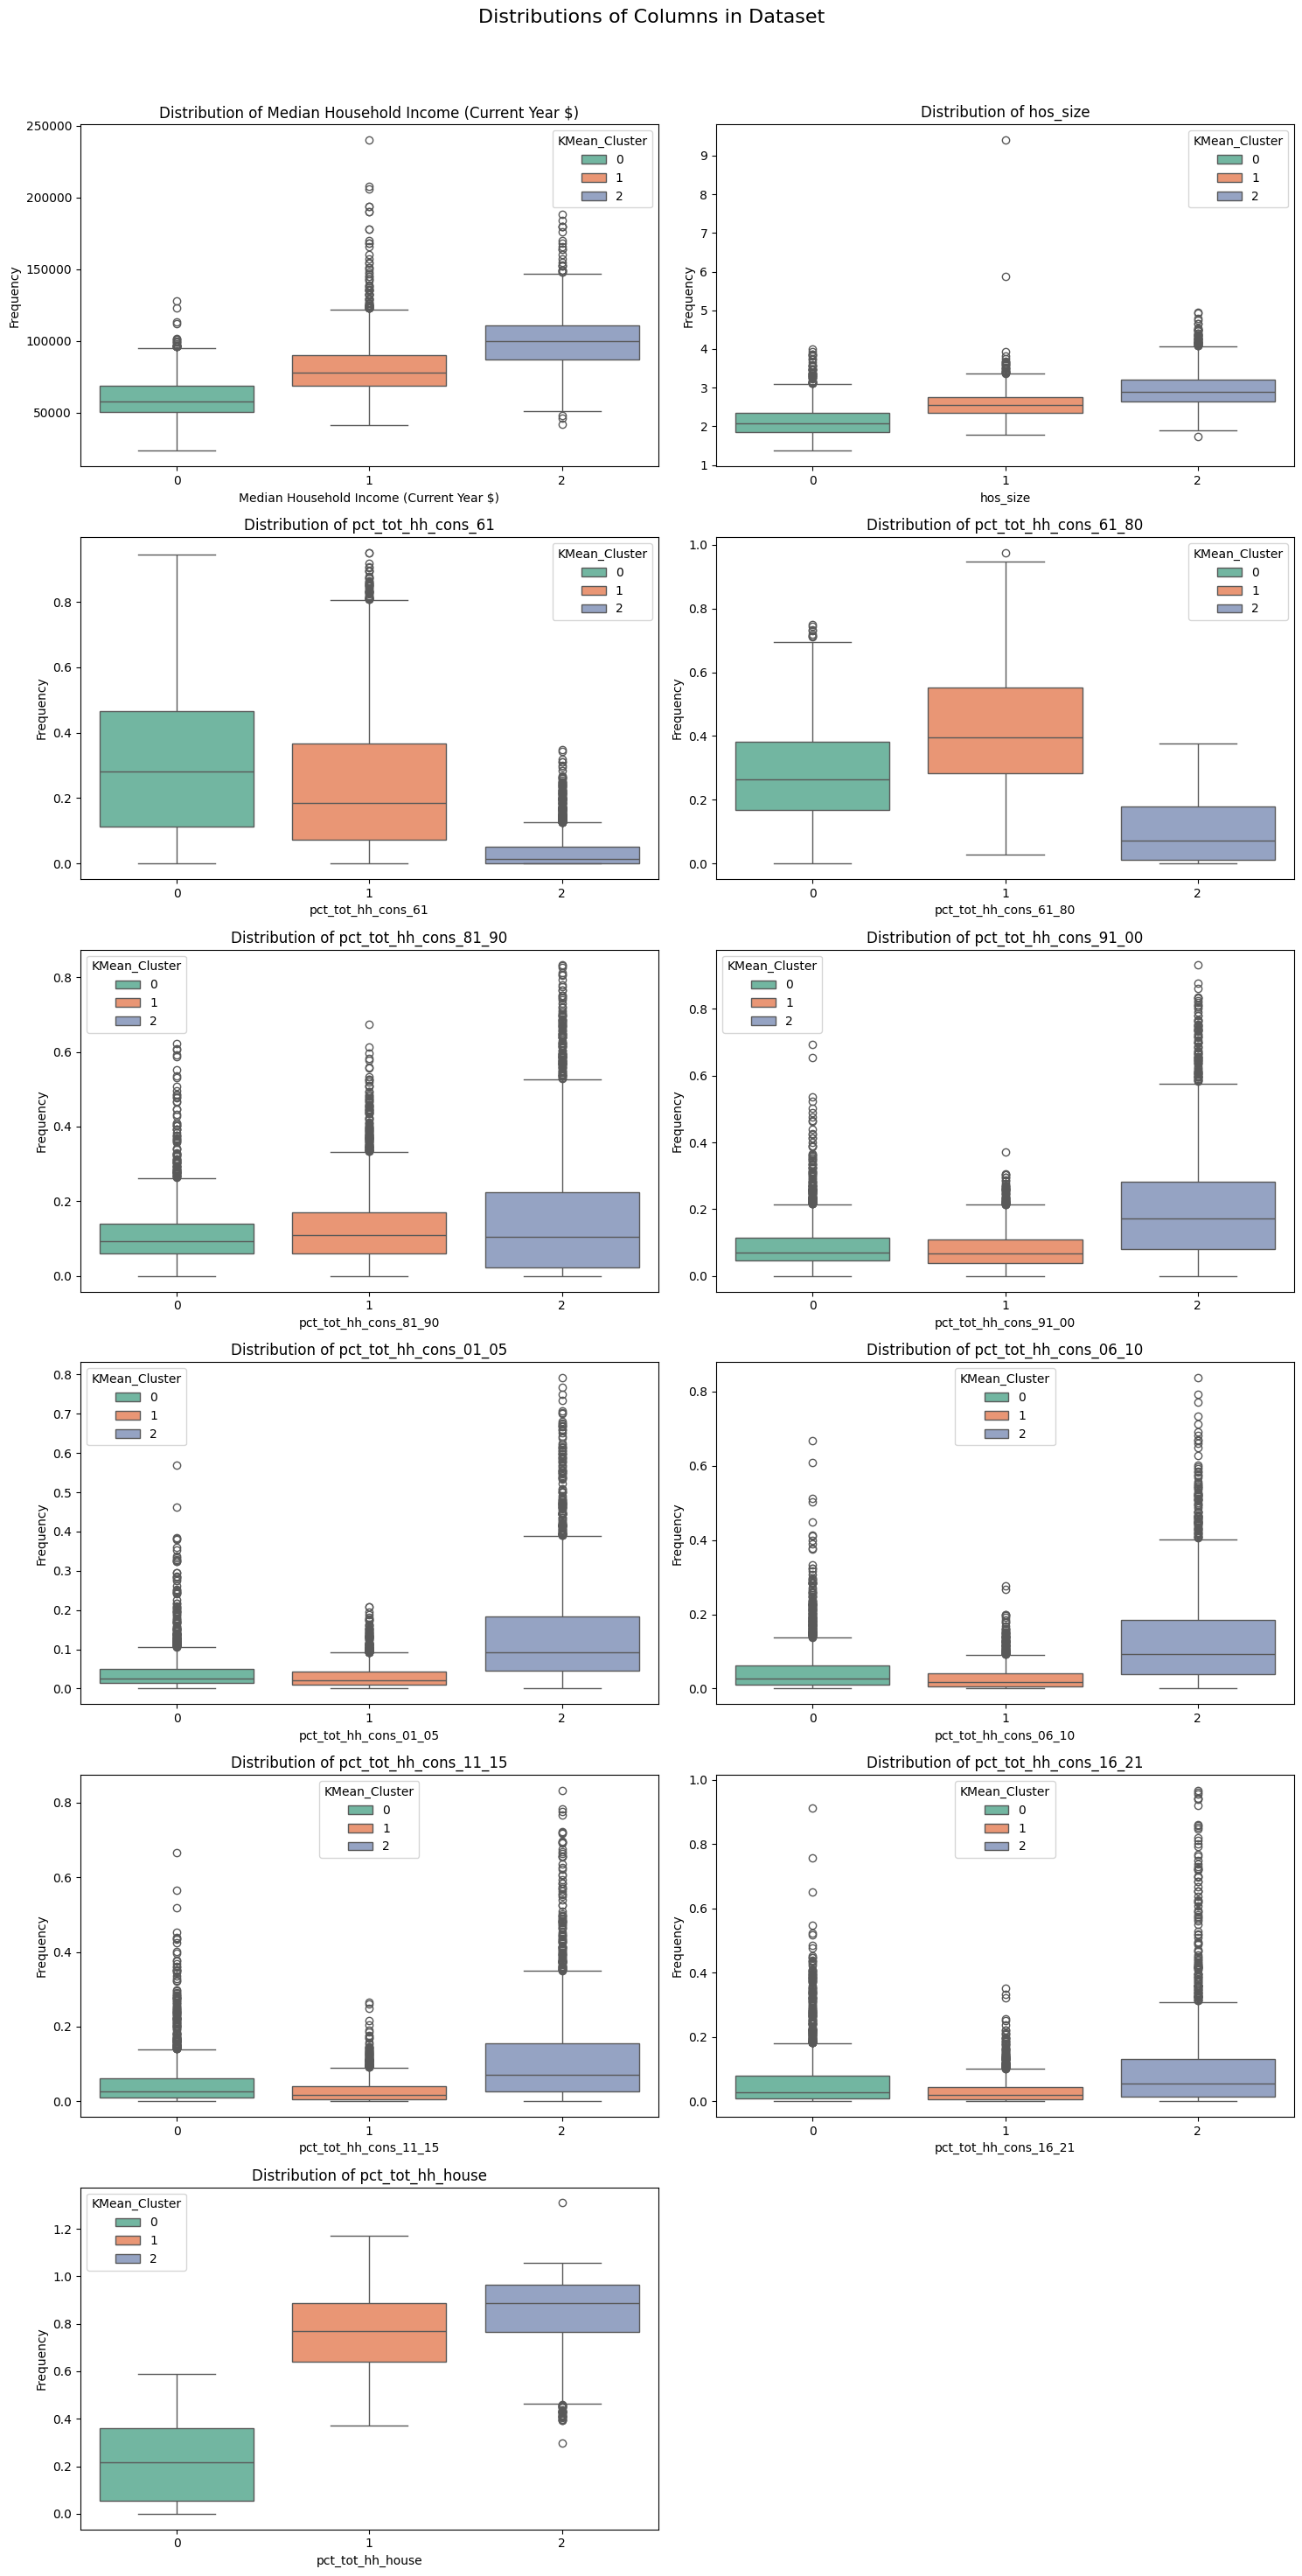

In [ ]:
#Plot Distribution of Variables
cluster_means = train_pct_2.groupby('KMean_Cluster').mean()
num_columns = len([col for col in cluster_means.columns if col != 'KMean_Cluster'])
rows = int(np.ceil(num_columns / 2))

fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
fig.suptitle('Distributions of Columns in Dataset', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(cluster_means.columns):
    if column != 'KMean_Cluster':
        sns.boxplot(x='KMean_Cluster',y=column, data = train_pct_2, ax=axes[i], hue='KMean_Cluster', palette=cluster_colors)
        col_name = reversed_mapping.get(column, column)
        axes[i].set_title(f'Distribution of {col_name}')
        axes[i].set_xlabel(col_name)
        axes[i].set_ylabel('Frequency')

for i in range(len(cluster_means.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


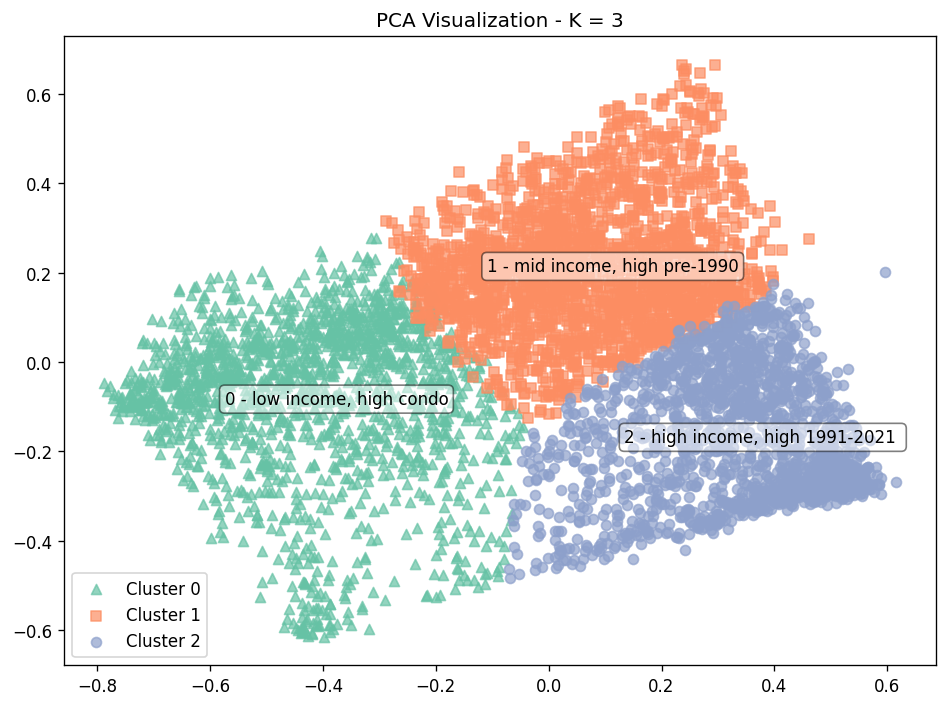

In [ ]:
clusters = train_pct_2['KMean_Cluster']

# Reduce dimensions using PCA
pca = PCA(n_components=2, random_state=42)
train_Scaled_pca = pca.fit_transform(train_Scaled)

cluster_descriptions = {
    0: "low income, high condo",
    1: "mid income, high pre-1990",
    2: "high income, high 1991-2021 "
}

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

for l, c, m in zip(range(0, 3), cluster_colors[0:3], ('^', 's', 'o')):
    ax.scatter(train_Scaled_pca[clusters == l, 0],
               train_Scaled_pca[clusters == l, 1],
               color=c,
               label='Cluster %s' % l,
               alpha=0.7,
               marker=m
               )

    ax.annotate(f"{l} - {cluster_descriptions[l]}",
                (train_Scaled_pca[clusters == l, 0].mean(),
                 train_Scaled_pca[clusters == l, 1].mean()),
                xytext=(15, -5), textcoords='offset points',
                ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))

ax.set_title("PCA Visualization - K = 3")
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

 The 10-dimensional dataset is visualized onto a 2-dimensional scatter plot using PCA dimension reduction to better understand the clustering quality. The visualization indicates clear boundaries between each cluster, signifying well-separated clusters each possessing distinct characteristics.

In [ ]:
explained_variance = pca.explained_variance_ratio_

# Eigenvectors (principal components loadings)
loadings = pd.DataFrame(pca.components_, columns=train_Scaled.columns, index=['PC1', 'PC2'])

print("Explained Variance Ratio (Proportion of Variance Explained):")
print(explained_variance)

print("\nPrincipal Component Loadings (Contribution of Original Features):")
print(loadings)

Explained Variance Ratio (Proportion of Variance Explained):
[0.43343618 0.19055191]

Principal Component Loadings (Contribution of Original Features):
     median_income  hos_size  pct_tot_hh_cons_61  pct_tot_hh_cons_61_80  \
PC1       0.243110  0.132632           -0.339126              -0.144411   
PC2      -0.054835 -0.021631            0.279506               0.749449   

     pct_tot_hh_cons_81_90  pct_tot_hh_cons_91_00  pct_tot_hh_cons_01_05  \
PC1               0.066238               0.132177               0.108268   
PC2               0.037926              -0.206895              -0.208704   

     pct_tot_hh_cons_06_10  pct_tot_hh_cons_11_15  pct_tot_hh_cons_16_21  \
PC1               0.083130               0.059030               0.033813   
PC2              -0.235315              -0.218082              -0.199960   

     pct_tot_hh_house  
PC1          0.861584  
PC2          0.354979  


In [ ]:
centroids = pd.DataFrame(kmean.cluster_centers_, columns=train_Scaled.columns)
importance = centroids.max() - centroids.min()

# Sort variables by importance
importance_sorted = importance.sort_values(ascending=False)
print("Variable Importance:")
print(importance_sorted)

Variable Importance:
pct_tot_hh_house         0.626081
pct_tot_hh_cons_61_80    0.320725
pct_tot_hh_cons_61       0.267201
median_income            0.183402
pct_tot_hh_cons_91_00    0.129287
pct_tot_hh_cons_01_05    0.108909
pct_tot_hh_cons_06_10    0.103431
hos_size                 0.102580
pct_tot_hh_cons_11_15    0.088335
pct_tot_hh_cons_16_21    0.074470
pct_tot_hh_cons_81_90    0.047861
dtype: float64


### BIRCH Clustering

##### Find best K - Silhouette Method

- highest silhouette score at k = 3

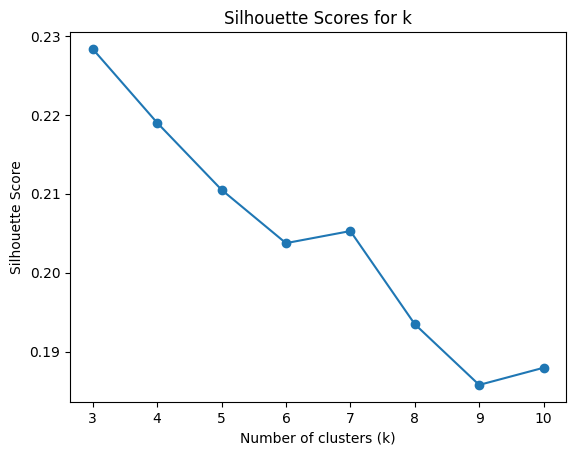

In [ ]:
silhouette_scores = []
for k in range(3, 11):
    birch = Birch(n_clusters=k, threshold=0.3)
    birch.fit(train_Scaled)
    score = silhouette_score(train_Scaled, birch.labels_)
    silhouette_scores.append(score)

plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

#### Fit BIRCH Model

In [ ]:
opt_k = 3
birch = Birch(n_clusters=opt_k)
birch_cluster = birch.fit_predict(train_Scaled)
train_pct_2['BIRCH_Cluster'] = birch.labels_

cluster_median_income = train_pct_2.groupby('BIRCH_Cluster')['median_income'].median().sort_values()

# Mapping Cluster Lable lowest median income should map to 0, next to 1, and highest to 2
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_median_income.index)}
train_pct_2['BIRCH_Cluster'] = train_pct_2['BIRCH_Cluster'].map(cluster_mapping)


##### BIRCH VS. KMeans Model Comparison

Cluster Difference
- pct_tot_hh_cons_91_00
- pct_tot_hh_cons_01_05
- pct_tot_hh_house

BIRCH Cluster 1 and K Means Cluster 2 share some common characteristics

In [ ]:
#mean summary
train_pct_2.groupby('BIRCH_Cluster').mean()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house,KMean_Cluster
BIRCH_Cluster,,,,,,,,,,,,
0,60059.938462,2.139161,0.307473,0.281588,0.112329,0.092139,0.042429,0.050015,0.050193,0.062886,0.219060,0.003077
1,81031.603053,2.573932,0.249006,0.423224,0.131347,0.078640,0.030295,0.028670,0.026272,0.030449,0.759224,0.993893
2,99759.879154,2.962674,0.038156,0.101684,0.160828,0.207205,0.138908,0.131980,0.114775,0.104905,0.845654,1.992145


In [ ]:
train_pct_2.groupby('KMean_Cluster').mean()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house,BIRCH_Cluster
KMean_Cluster,,,,,,,,,,,,
0,60083.353733,2.140724,0.304716,0.283138,0.112947,0.092331,0.042462,0.050088,0.050234,0.063133,0.219844,0.009792
1,81172.394509,2.575032,0.250386,0.421526,0.131101,0.078582,0.030446,0.028844,0.026540,0.030477,0.761302,1.002034
2,99808.272506,2.964785,0.037515,0.100800,0.160809,0.207869,0.139355,0.132275,0.114875,0.104947,0.845925,2.000000


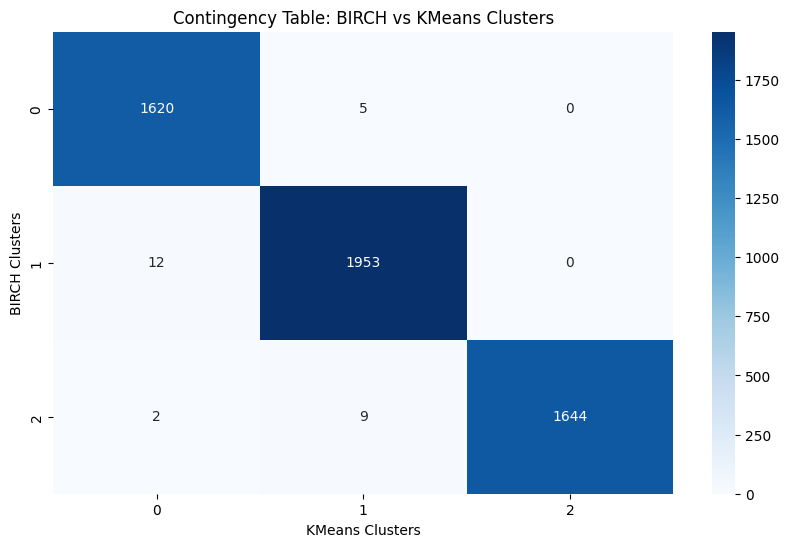

In [ ]:
contingency = pd.crosstab(train_pct_2['BIRCH_Cluster'], train_pct_2['KMean_Cluster'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title("Contingency Table: BIRCH vs KMeans Clusters")
plt.xlabel("KMeans Clusters")
plt.ylabel("BIRCH Clusters")
plt.show()

## Part II

In [ ]:
def clean_data(df):
    # Column mapping dictionary to rename columns
    column_mapping = {
        'Total Population': 'tot_pop',
        'Total Households': 'tot_hos',
        'Median Household Income (Current Year $)': 'median_income',
        'Total Households For Period Of Construction': 'tot_hh_cons',
        'Total Households For Period Of Construction Built Before 1961': 'tot_hh_cons_61',
        'Total Households For Period Of Construction Built Between 1961 And 1980': 'tot_hh_cons_61_80',
        'Total Households For Period Of Construction Built Between 1981 And 190': 'tot_hh_cons_81_90',
        'Total Households For Period Of Construction Built Between 1991 And 2000': 'tot_hh_cons_91_00',
        'Total Households For Period Of Construction Built Between 2001 And 2005': 'tot_hh_cons_01_05',
        'Total Households For Period Of Construction Built Between 2006 And 2010': 'tot_hh_cons_06_10',
        'Total Households For Period Of Construction Built Between 2011 And 2015': 'tot_hh_cons_11_15',
        'Total Households For Period Of Construction Built Between 2016 And 2021': 'tot_hh_cons_16_21',
        'Total Households For Structure Type Houses': 'tot_hh_house',
        'Total Households For Structure Type Apartment, Building Low And High Rise': 'tot_hh_apt',
        'Total Households For Structure Type Other Dwelling Types': 'tot_hh_other',
        'Total Households for Tenure': 'tot_hh_tenure',
        'Dwellings by Tenure Owner': 'tot_hh_owner',
        'Dwellings by Tenure Renter': 'tot_hh_rent'
    }

    # Reverse mapping dictionary if needed for reverting
    reversed_mapping = {v: k for k, v in column_mapping.items()}

    # Rename columns using the column_mapping dictionary
    df.rename(columns=column_mapping, inplace=True)

    # Calculate household size
    df['hos_size'] = df['tot_pop'] / df['tot_hos']

    # Drop unnecessary columns
    df = df.drop(columns=['tot_hh_cons', 'tot_hh_tenure', 'tot_pop', 'tot_hh_owner', 'tot_hh_rent','tot_hh_other','tot_hh_apt'])
    excluded_col = ['hos_size', 'median_income','tot_hos']


    pct_col = [col for col in df.columns if col not in excluded_col]

    for col in pct_col:
        df[f'pct_{col}'] = (df[col] / df['tot_hos'])
        df.drop(columns = col, inplace = True)

    return df

In [ ]:
train_p2 = train.copy()
train_p2 = clean_data(train_p2).drop(columns = 'median_income')

In [ ]:
train_p2.head()

,tot_hos,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house
0,1235.0,2.500405,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028
1,1665.0,3.536937,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964
2,2775.0,2.915315,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856
3,1775.0,2.295211,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676
4,1385.0,2.629603,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292


In [ ]:
Scaler = MinMaxScaler()
columns_to_scale = ['hos_size', 'tot_hos']
train_p2_scaled = train_p2.copy()

train_p2_scaled[columns_to_scale] = Scaler.fit_transform(train_p2_scaled[columns_to_scale])

### K-mean Clustering

##### Silhouette Scores

- K = 3 has highest Silhouette Score

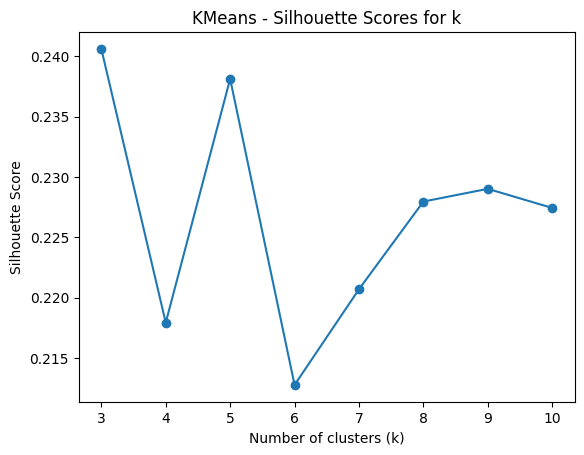

In [ ]:
silhouette_scores = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(train_p2_scaled)
    score = silhouette_score(train_p2_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.title('KMeans - Silhouette Scores for k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

##### Elbow Method

- elbow at k = 3

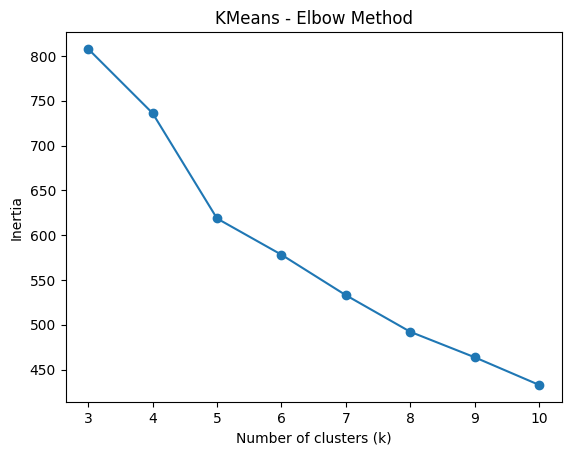

In [ ]:
inertia = []
k_values = range(3, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_p2_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('KMeans - Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
opt_k = 3
kmeans2 = KMeans(n_clusters = opt_k, random_state = 10)
cluster = kmeans2.fit_predict(train_p2_scaled)
train_p2['KMeans_Cluster'] = kmeans2.labels_

### BIRCH Clustering

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (9) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


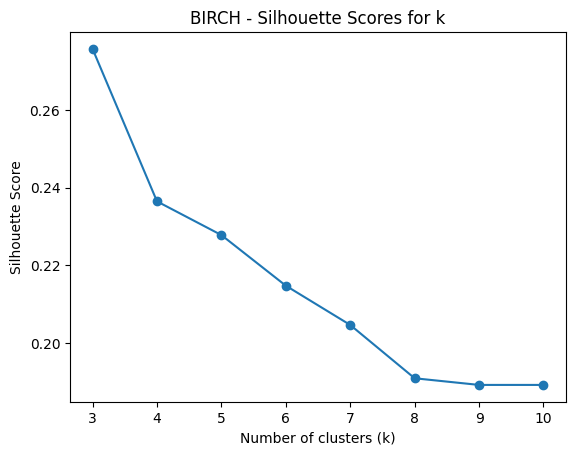

In [ ]:
silhouette_scores = []
for k in range(3, 11):
    birch = Birch(n_clusters=k, threshold=0.3)
    birch.fit(train_p2_scaled)
    score = silhouette_score(train_p2_scaled, birch.labels_)
    silhouette_scores.append(score)

plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.title('BIRCH - Silhouette Scores for k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
opt_k = 3
birch2 = Birch(n_clusters=opt_k)
birch_cluster = birch2.fit_predict(train_p2_scaled)
train_p2['BIRCH_Cluster'] = birch2.labels_

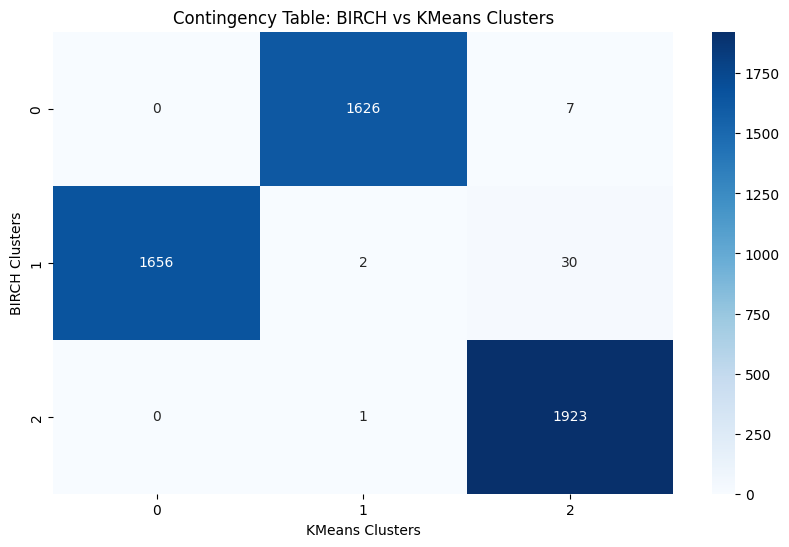

In [ ]:
contingency = pd.crosstab(train_p2['BIRCH_Cluster'], train_p2['KMeans_Cluster'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title("Contingency Table: BIRCH vs KMeans Clusters")
plt.xlabel("KMeans Clusters")
plt.ylabel("BIRCH Clusters")
plt.show()

In [ ]:
#Compare silhouette score for KMeans and BIRCH
kmeans_silhouette = silhouette_score(train_p2_scaled, kmeans2.labels_)
print(f'Silhouette Score for KMeans (k={opt_k}): {kmeans_silhouette}')


birch_silhouette = silhouette_score(train_p2_scaled, birch2.labels_)
print(f'Silhouette Score for BIRCH (k={opt_k}): {birch_silhouette}')

Silhouette Score for KMeans (k=3): 0.2406207134147616
Silhouette Score for BIRCH (k=3): 0.24010913950343574


In [ ]:
train_p2 = train_p2.drop(columns= ['BIRCH_Cluster'])

As each cluster has roughly similar sizes, use KMeans Clustering Model

### Target Variable Predictions

##### KMeans Model

In [ ]:
#Add cluster column to the table
train_clean = train_pct.copy()
train_clean['cluster'] = kmeans2.labels_
train_clean.head()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house,cluster
0,107000.0,2.500405,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028,2
1,111000.0,3.536937,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964,0
2,105000.0,2.915315,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856,0
3,65000.0,2.295211,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676,2
4,101000.0,2.629603,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292,0


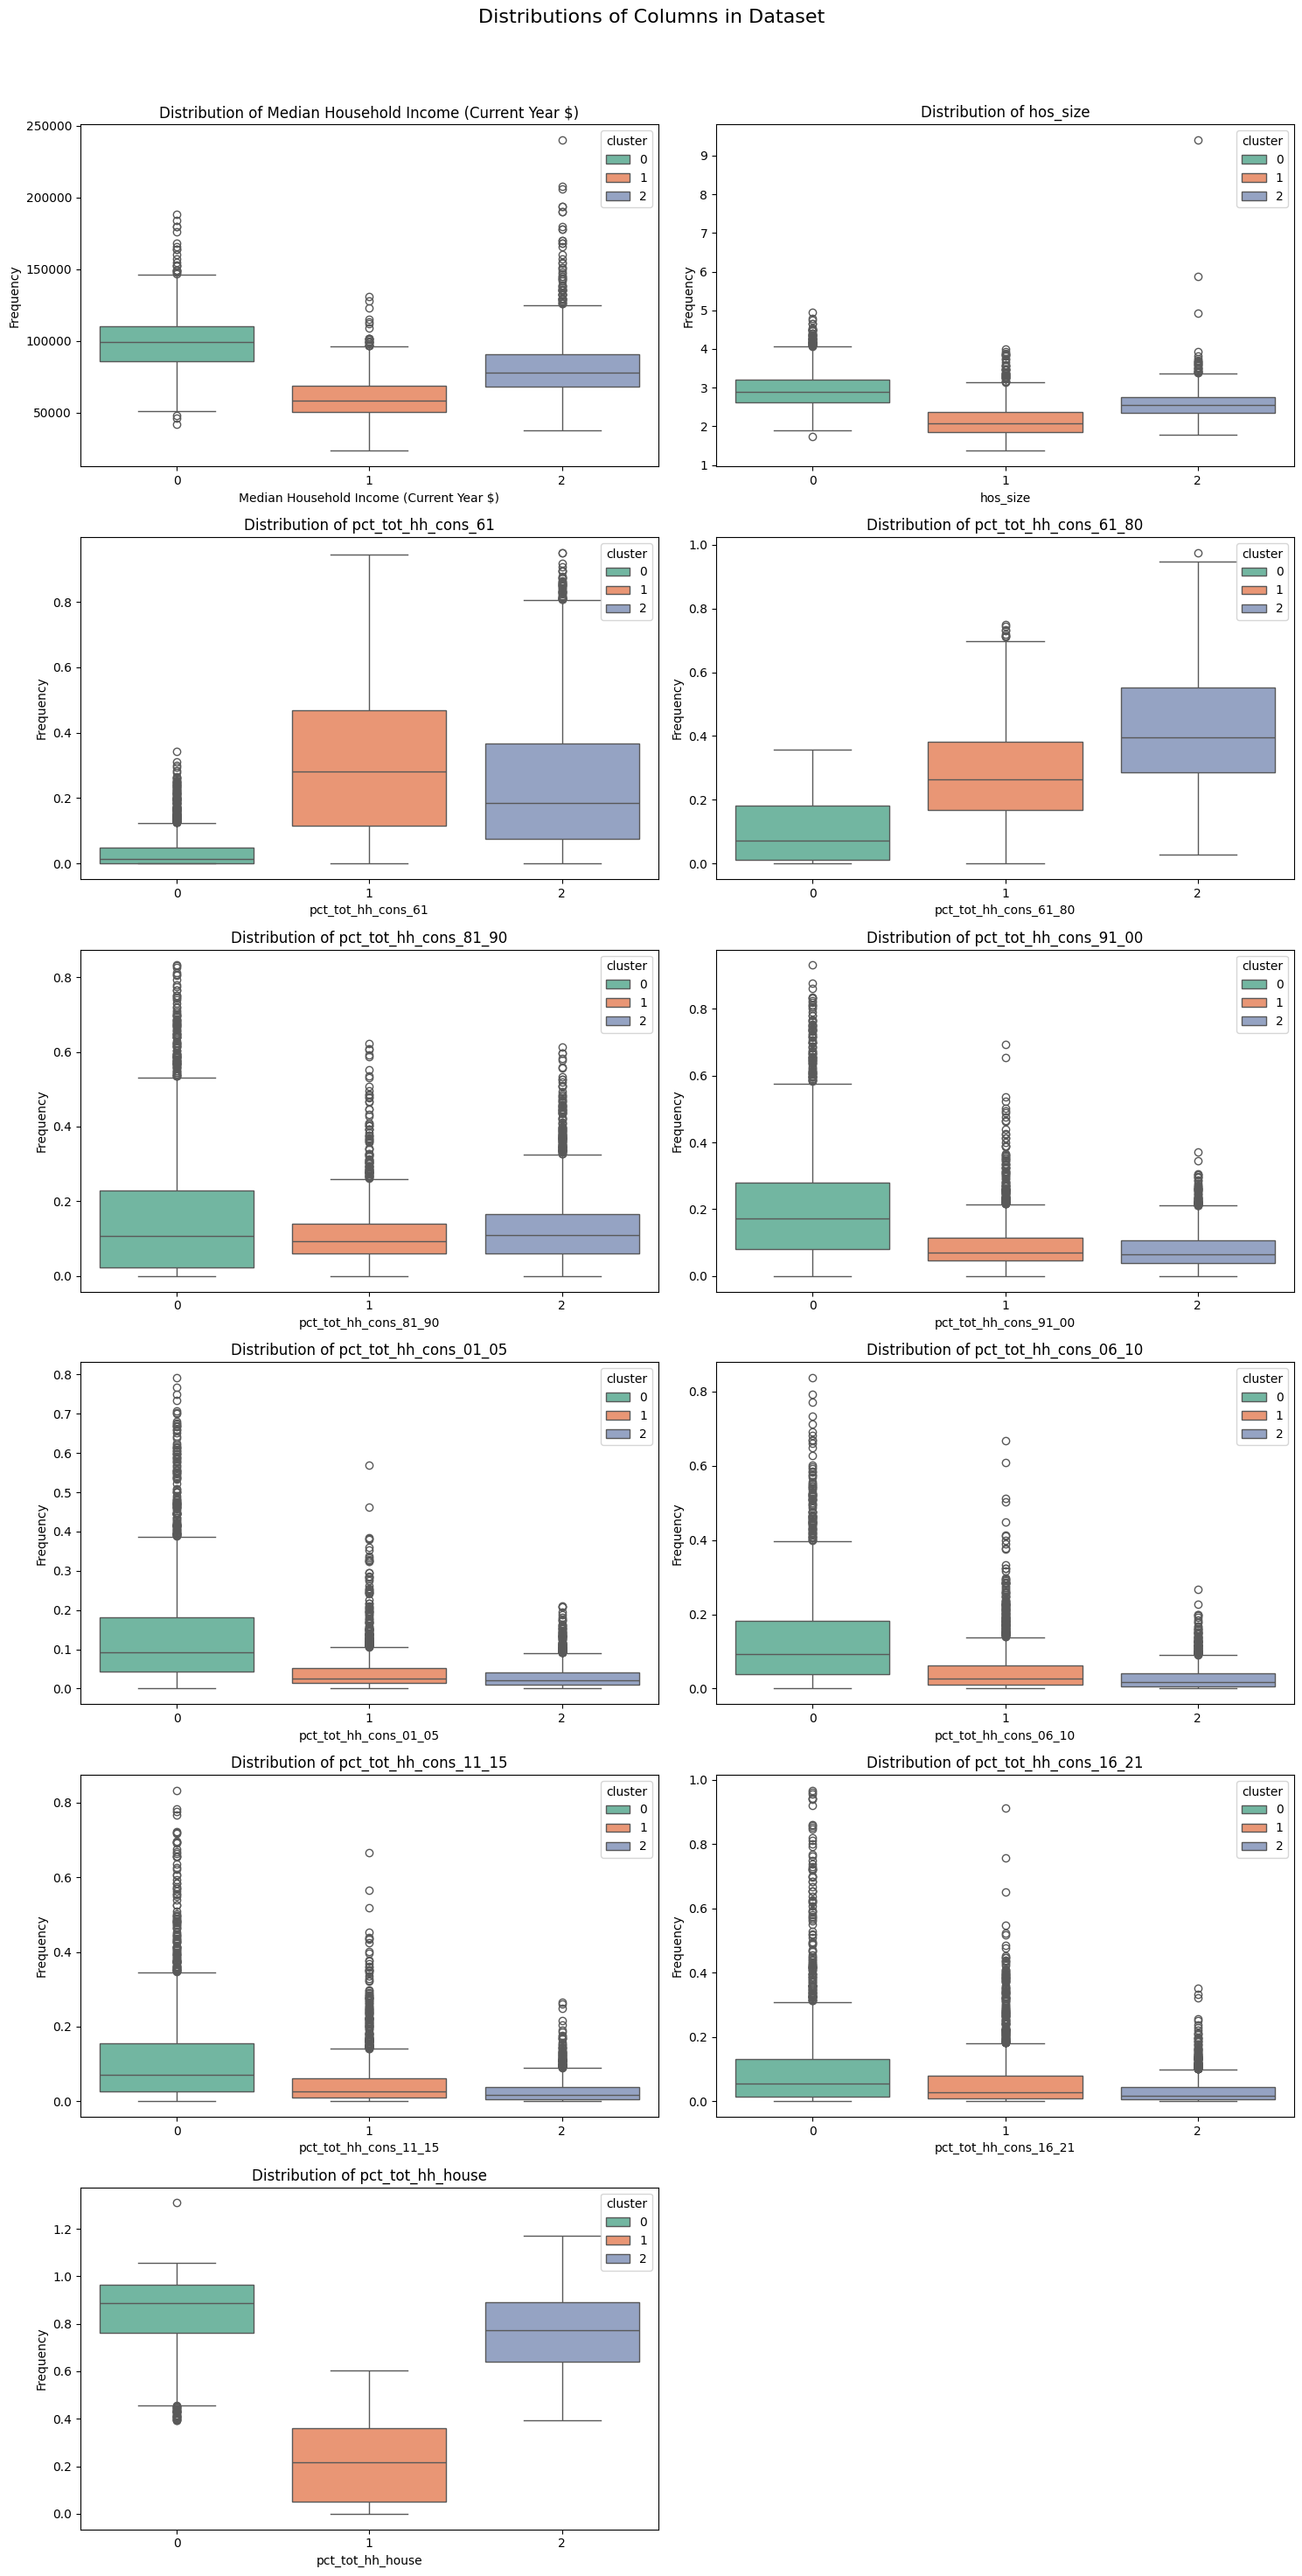

In [ ]:
#Plot Distribution of Variables
cluster_means = train_clean.groupby('cluster').mean()
num_columns = len([col for col in cluster_means.columns if col != 'cluster'])
rows = int(np.ceil(num_columns / 2))

fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
fig.suptitle('Distributions of Columns in Dataset', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(cluster_means.columns):
    if column != 'cluster':
        sns.boxplot(x='cluster',y=column, data = train_clean, ax=axes[i], hue='cluster', palette=cluster_colors)
        col_name = reversed_mapping.get(column, column)
        axes[i].set_title(f'Distribution of {col_name}')
        axes[i].set_xlabel(col_name)
        axes[i].set_ylabel('Frequency')

for i in range(len(cluster_means.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

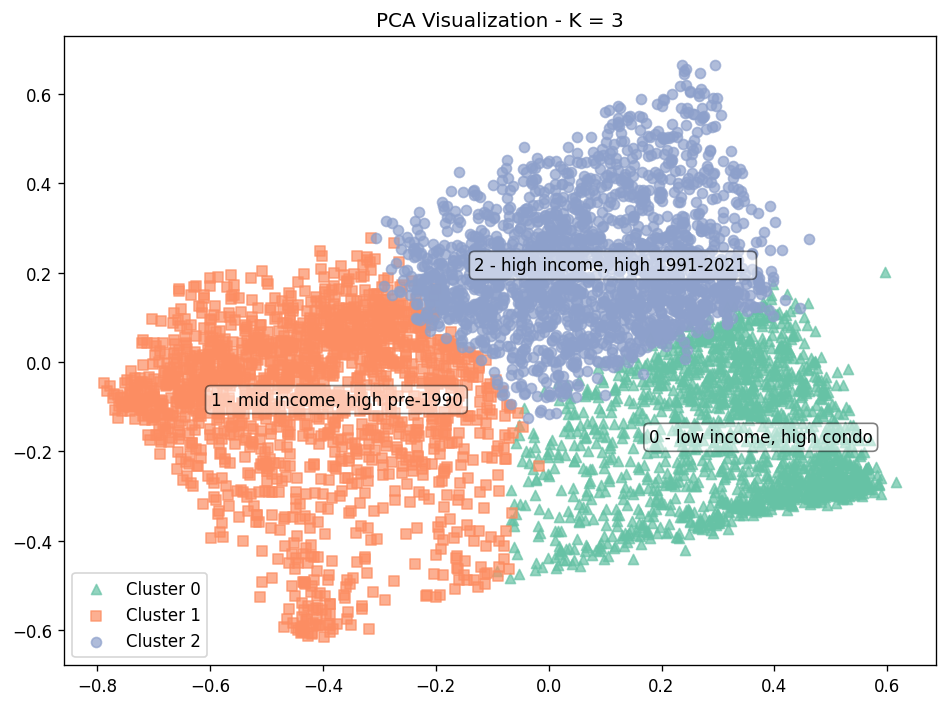

In [ ]:
clusters = train_clean['cluster']

# Reduce dimensions using PCA
pca = PCA(n_components=2, random_state=42)
train_Scaled_pca = pca.fit_transform(train_Scaled)

cluster_descriptions = {
    0: "low income, high condo",
    1: "mid income, high pre-1990",
    2: "high income, high 1991-2021 "
}

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

for l, c, m in zip(range(0, 3), cluster_colors[0:3], ('^', 's', 'o')):
    ax.scatter(train_Scaled_pca[clusters == l, 0],
               train_Scaled_pca[clusters == l, 1],
               color=c,
               label='Cluster %s' % l,
               alpha=0.7,
               marker=m
               )

    ax.annotate(f"{l} - {cluster_descriptions[l]}",
                (train_Scaled_pca[clusters == l, 0].mean(),
                 train_Scaled_pca[clusters == l, 1].mean()),
                xytext=(15, -5), textcoords='offset points',
                ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))

ax.set_title("PCA Visualization - K = 3")
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
#Summary of Cluster 0
train_clean[train_clean['cluster']  ==0].describe()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house,cluster
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.0
mean,99069.082126,2.954913,0.037271,0.101450,0.162228,0.207353,0.138534,0.131990,0.114738,0.104899,0.843024,0.0
std,18211.540397,0.464213,0.053994,0.095355,0.178287,0.172721,0.138997,0.129968,0.130117,0.147782,0.147542,0.0
min,42000.000000,1.739286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392786,0.0
25%,86000.000000,2.628018,0.000000,0.012472,0.023171,0.080563,0.043712,0.037918,0.025696,0.012659,0.760891,0.0
50%,99000.000000,2.892670,0.013754,0.071812,0.106412,0.171252,0.092805,0.091989,0.070702,0.054270,0.885877,0.0
75%,110000.000000,3.206151,0.049894,0.181016,0.227962,0.280021,0.181377,0.182055,0.154485,0.131699,0.963971,0.0
max,188000.000000,4.948256,0.342424,0.357942,0.831967,0.930233,0.791946,0.836879,0.833333,0.967568,1.309211,0.0


In [ ]:
#Summary of Cluster 1
train_clean[train_clean['cluster']  ==1].describe()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house,cluster
count,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.0
mean,60467.587477,2.145490,0.305910,0.281882,0.112519,0.092460,0.042654,0.050183,0.050331,0.063132,0.219335,1.0
std,14287.543513,0.402174,0.219511,0.153401,0.083386,0.075355,0.052164,0.065815,0.069306,0.091382,0.164508,0.0
min,23400.000000,1.366667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50400.000000,1.862264,0.114286,0.168317,0.059406,0.045455,0.014644,0.011111,0.009464,0.009646,0.052448,1.0
50%,58400.000000,2.072684,0.280632,0.263538,0.092511,0.071322,0.026217,0.026667,0.026549,0.028024,0.215496,1.0
75%,69000.000000,2.375785,0.468750,0.381238,0.139896,0.113671,0.051383,0.062130,0.061947,0.078273,0.358760,1.0
max,131000.000000,3.991489,0.945122,0.748918,0.622517,0.694134,0.569620,0.666667,0.666667,0.913043,0.603448,1.0


In [ ]:
#Summary of Cluster 2
train_clean[train_clean['cluster']  ==2].describe()

,median_income,hos_size,pct_tot_hh_cons_61,pct_tot_hh_cons_61_80,pct_tot_hh_cons_81_90,pct_tot_hh_cons_91_00,pct_tot_hh_cons_01_05,pct_tot_hh_cons_06_10,pct_tot_hh_cons_11_15,pct_tot_hh_cons_16_21,pct_tot_hh_house,cluster
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.0
mean,81309.693878,2.575917,0.251041,0.423630,0.130030,0.078155,0.030344,0.028426,0.026095,0.030146,0.762277,2.0
std,20142.256403,0.358746,0.217144,0.188852,0.097840,0.054615,0.030263,0.031579,0.030645,0.036770,0.150108,0.0
min,38000.000000,1.784416,0.000000,0.028455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.394834,2.0
25%,68000.000000,2.344602,0.074441,0.286528,0.060760,0.037525,0.009524,0.006547,0.004731,0.006020,0.641728,2.0
50%,78000.000000,2.542910,0.185845,0.396928,0.108587,0.065862,0.021961,0.018349,0.015979,0.017970,0.772435,2.0
75%,91000.000000,2.761782,0.367873,0.552832,0.166667,0.107143,0.042254,0.040575,0.038844,0.043871,0.889595,2.0
max,240000.000000,9.400000,0.951220,0.975728,0.612403,0.371429,0.210227,0.268354,0.264214,0.352041,1.171429,2.0


##### Prediction Model Fitting

##### Random Forest

In [ ]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from dmba import plotDecisionTree, regressionSummary

no display found. Using non-interactive Agg backend


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

clusters = train_clean['cluster'].unique()

# Dictionary to store models and their performance
cluster_models = {}

for cluster in clusters:
    # Filter data for the current cluster
    df = train_clean[train_clean['cluster'] == cluster].copy()
    X = df.drop(columns=['median_income', 'cluster'])
    y = df['median_income']

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    # Initialize the Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)

    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_val, y_pred)

    print(f"Cluster {cluster} - Mean Squared Error: {mse:.2f}")

    # Store the model and MSE for the cluster
    cluster_models[cluster] = {
        'model': best_model,
        'mse': mse
    }


Cluster 2 - Mean Squared Error: 238628665.10
Cluster 0 - Mean Squared Error: 182277396.11
Cluster 1 - Mean Squared Error: 88275218.17


### ANN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd

# Specify the cluster to process (e.g., 0, 1, or 2)
cluster = 0  # Change this value to the desired cluster

# Filter data for the selected cluster
df = train_clean[train_clean['cluster'] == cluster].copy()

print(f"Processing Cluster {cluster}, Data Shape: {df.shape}")

if df.shape[0] < 2:  # Check if there is enough data
    print(f"Cluster {cluster} has insufficient data. Exiting...")
else:
    # Scale features
    scaler = MinMaxScaler()
    columns_to_scale = ['hos_size']
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Scale target variable
    y_scaler = MinMaxScaler()
    df['median_income'] = y_scaler.fit_transform(df[['median_income']])

    # Split features and target
    X = df.drop(columns=['median_income', 'cluster'])
    y = df['median_income']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build Neural Network
    np.random.seed(8413)
    model = Sequential()
    input_dim = X_train.shape[1]
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(), metrics=['mean_squared_error'])

    print(f"Training model for Cluster {cluster}...")
    model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0)

    # Make predictions
    predictions = model.predict(X_test)

    # Rescale predictions and actual values to original scale
    y_test_rescaled = y_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))
    predictions_rescaled = y_scaler.inverse_transform(predictions)

    # Evaluate model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)

    print(f"Cluster {cluster} - MSE: {mse:.2f}")



Processing Cluster 0, Data Shape: (1656, 12)
Training model for Cluster 0...
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Cluster 0 - MSE: 191903941.38


In [ ]:


# Specify the cluster to process (e.g., 0, 1, or 2)
cluster = 1 # Change this value to the desired cluster

# Filter data for the selected cluster
df = train_clean[train_clean['cluster'] == cluster].copy()

print(f"Processing Cluster {cluster}, Data Shape: {df.shape}")

if df.shape[0] < 2:  # Check if there is enough data
    print(f"Cluster {cluster} has insufficient data. Exiting...")
else:
    # Scale features
    scaler = MinMaxScaler()
    columns_to_scale = ['hos_size']
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Scale target variable
    y_scaler = MinMaxScaler()
    df['median_income'] = y_scaler.fit_transform(df[['median_income']])

    # Split features and target
    X = df.drop(columns=['median_income', 'cluster'])
    y = df['median_income']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build Neural Network
    np.random.seed(8413)
    model = Sequential()
    input_dim = X_train.shape[1]
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(), metrics=['mean_squared_error'])

    print(f"Training model for Cluster {cluster}...")
    model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0)

    # Make predictions
    predictions = model.predict(X_test)

    # Rescale predictions and actual values to original scale
    y_test_rescaled = y_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))
    predictions_rescaled = y_scaler.inverse_transform(predictions)

    # Evaluate model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)

    print(f"Cluster {cluster} - MSE: {mse:.2f}")


Processing Cluster 1, Data Shape: (1629, 12)
Training model for Cluster 1...
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Cluster 1 - MSE: 111864660.43


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd

# Specify the cluster to process (e.g., 0, 1, or 2)
cluster = 2  # Change this value to the desired cluster

# Filter data for the selected cluster
df = train_clean[train_clean['cluster'] == cluster].copy()

print(f"Processing Cluster {cluster}, Data Shape: {df.shape}")

if df.shape[0] < 2:  # Check if there is enough data
    print(f"Cluster {cluster} has insufficient data. Exiting...")
else:
    # Scale features
    scaler = MinMaxScaler()
    columns_to_scale = ['hos_size']
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Scale target variable
    y_scaler = MinMaxScaler()
    df['median_income'] = y_scaler.fit_transform(df[['median_income']])

    # Split features and target
    X = df.drop(columns=['median_income', 'cluster'])
    y = df['median_income']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build Neural Network
    np.random.seed(8413)
    model = Sequential()
    input_dim = X_train.shape[1]
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(), metrics=['mean_squared_error'])

    print(f"Training model for Cluster {cluster}...")
    model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0)

    # Make predictions
    predictions = model.predict(X_test)

    # Rescale predictions and actual values to original scale
    y_test_rescaled = y_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))
    predictions_rescaled = y_scaler.inverse_transform(predictions)

    # Evaluate model
    # Evaluate model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)

    print(f"Cluster {cluster} - MSE: {mse:.2f}")

Processing Cluster 2, Data Shape: (1960, 12)
Training model for Cluster 2...
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Cluster 2 - MSE: 283309661.14


### KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd

# Specify the cluster to process (e.g., 0, 1, or 2)
cluster = 0  # Change this value to the desired cluster

# Filter data for the selected cluster
df = train_clean[train_clean['cluster'] == cluster].copy()

print(f"Processing Cluster {cluster}, Data Shape: {df.shape}")

if df.shape[0] < 2:  # Check if there is enough data
    print(f"Cluster {cluster} has insufficient data. Exiting...")
else:
    # Scale features
    scaler = MinMaxScaler()
    columns_to_scale = ['hos_size']
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Scale target variable
    y_scaler = MinMaxScaler()
    df['median_income'] = y_scaler.fit_transform(df[['median_income']])

    # Split features and target
    X = df.drop(columns=['median_income', 'cluster'])
    y = df['median_income']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train KNN model
    knn = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors as needed
    knn.fit(X_train, y_train)

    # Make predictions
    predictions = knn.predict(X_test)

    # Rescale predictions and actual values to original scale
    y_test_rescaled = y_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))
    predictions_rescaled = y_scaler.inverse_transform(predictions.reshape(-1, 1))

    # Evaluate model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)

    print(f"Cluster {cluster} - MSE: {mse:.2f}")


Processing Cluster 0, Data Shape: (1656, 12)
Cluster 0 - MSE: 204898806.02


In [ ]:

# Specify the cluster to process (e.g., 0, 1, or 2)
cluster = 1  # Change this value to the desired cluster

# Filter data for the selected cluster
df = train_clean[train_clean['cluster'] == cluster].copy()

print(f"Processing Cluster {cluster}, Data Shape: {df.shape}")

if df.shape[0] < 2:  # Check if there is enough data
    print(f"Cluster {cluster} has insufficient data. Exiting...")
else:
    # Scale features
    scaler = MinMaxScaler()
    columns_to_scale = ['hos_size']
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Scale target variable
    y_scaler = MinMaxScaler()
    df['median_income'] = y_scaler.fit_transform(df[['median_income']])

    # Split features and target
    X = df.drop(columns=['median_income', 'cluster'])
    y = df['median_income']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train KNN model
    knn = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors as needed
    knn.fit(X_train, y_train)

    # Make predictions
    predictions = knn.predict(X_test)

    # Rescale predictions and actual values to original scale
    y_test_rescaled = y_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))
    predictions_rescaled = y_scaler.inverse_transform(predictions.reshape(-1, 1))

    # Evaluate model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)

    print(f"Cluster {cluster} - MSE: {mse:.2f}")


Processing Cluster 1, Data Shape: (1629, 12)
Cluster 1 - MSE: 113631818.40


In [ ]:


# Specify the cluster to process (e.g., 0, 1, or 2)
cluster = 2  # Change this value to the desired cluster

# Filter data for the selected cluster
df = train_clean[train_clean['cluster'] == cluster].copy()

print(f"Processing Cluster {cluster}, Data Shape: {df.shape}")

if df.shape[0] < 2:  # Check if there is enough data
    print(f"Cluster {cluster} has insufficient data. Exiting...")
else:
    # Scale features
    scaler = MinMaxScaler()
    columns_to_scale = ['hos_size']
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Scale target variable
    y_scaler = MinMaxScaler()
    df['median_income'] = y_scaler.fit_transform(df[['median_income']])

    # Split features and target
    X = df.drop(columns=['median_income', 'cluster'])
    y = df['median_income']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train KNN model
    knn = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors as needed
    knn.fit(X_train, y_train)

    # Make predictions
    predictions = knn.predict(X_test)

    # Rescale predictions and actual values to original scale
    y_test_rescaled = y_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))
    predictions_rescaled = y_scaler.inverse_transform(predictions.reshape(-1, 1))

    # Evaluate model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)

    print(f"Cluster {cluster} - MSE: {mse:.2f}")

Processing Cluster 2, Data Shape: (1960, 12)
Cluster 2 - MSE: 292119920.41


### Model for Global Dataset

Random Forest

In [ ]:

    # Filter data for the current cluster
df = train_clean.copy()
X = df.drop(columns=['median_income', 'cluster'])
y = df['median_income']

    # Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grid for Random Forest
param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    # Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

    # Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

    # Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

    # Make predictions on the validation set
y_pred = best_model.predict(X_val)

    # Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_pred)


    # Store the model and MSE for the cluster
cluster_models[cluster] = {
        'model': best_model,
        'mse': mse
    }


KNN

In [ ]:


# Filter data for the selected cluster
df = train_clean.copy()

    # Scale features
scaler = MinMaxScaler()
columns_to_scale = ['hos_size']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Scale target variable
y_scaler = MinMaxScaler()
df['median_income'] = y_scaler.fit_transform(df[['median_income']])

    # Split features and target
X = df.drop(columns=['median_income', 'cluster'])
y = df['median_income']

    # Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build Neural Network
np.random.seed(8413)
model = Sequential()
input_dim = X_train.shape[1]
model.add(Input(shape=(input_dim,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=RMSprop(), metrics=['mean_squared_error'])


model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0)

# Make predictions
predictions = model.predict(X_test)

# Rescale predictions and actual values to original scale
y_test_rescaled = y_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))
predictions_rescaled = y_scaler.inverse_transform(predictions)

    # Evaluate model
    # Evaluate model
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)

mse

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


177958301.9491483

KNN

In [ ]:


df = train_clean[train_clean['cluster'] == cluster].copy()


scaler = MinMaxScaler()
columns_to_scale = ['hos_size']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Scale target variable
y_scaler = MinMaxScaler()
df['median_income'] = y_scaler.fit_transform(df[['median_income']])

    # Split features and target
X = df.drop(columns=['median_income', 'cluster'])
y = df['median_income']

    # Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors as needed
knn.fit(X_train, y_train)

    # Make predictions
predictions = knn.predict(X_test)

    # Rescale predictions and actual values to original scale
y_test_rescaled = y_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))
predictions_rescaled = y_scaler.inverse_transform(predictions.reshape(-1, 1))

    # Evaluate model
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
mse


292119920.40816325